**Name:** Shreya Vinay Nayak

**Github Username:** ShreyaNayak256

**USC ID:** 8592810456

**i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).**

Ans: The time domain features that are usually used in time series classification are as follows:
Minimum, maximum, mean, median, standard deviation, first quartile, and third quartile, kurtosis, skewness, entropy etc.

**ii. Extract the time-domain features minimum, maximum, mean, median, stan- dard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.[2]**


In [1]:
!pip install rpy2

In [2]:
import pandas as pd
import numpy as np
import os
from scipy.stats import bootstrap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix,roc_auc_score,roc_curve
from sklearn.feature_selection import chi2
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import operator
from sklearn.metrics import mean_squared_error, r2_score,auc,roc_curve
from sklearn.preprocessing import normalize,LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV,RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
    

In [3]:
df=pd.read_csv('../data/training/bending1/dataset7.csv')
df.head()

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0     0      42.00       0.00      18.50       0.50      12.00       0.00
1   250      42.00       0.00      18.00       0.00      11.33       0.94
2   500      42.75       0.43      16.75       1.79      18.25       0.43
3   750      42.50       0.50      16.75       0.83      19.00       1.22
4  1000      43.00       0.82      16.25       0.83      18.00       0.00

In [4]:
df.describe()

time   avg_rss12   var_rss12   avg_rss13   var_rss13  \
count     480.000000  480.000000  480.000000  480.000000  480.000000   
mean    59875.000000   43.969125    0.413125   15.868021    0.666354   
std     34677.081769    1.618364    0.263111    3.742420    0.788985   
min         0.000000   36.250000    0.000000    1.500000    0.000000   
25%     29937.500000   43.310000    0.430000   14.250000    0.000000   
50%     59875.000000   44.500000    0.470000   16.250000    0.470000   
75%     89812.500000   44.670000    0.500000   18.000000    0.940000   
max    119750.000000   48.000000    1.500000   26.330000    5.170000   

        avg_rss23   var_rss23  
count  480.000000  480.000000  
mean    22.103750    0.555313  
std      3.318301    0.487826  
min     11.330000    0.000000  
25%     20.500000    0.000000  
50%     21.670000    0.490000  
75%     23.750000    0.830000  
max     30.750000    2.960000

In [5]:
df.describe().iloc[[3,7,1,5,2,4,6]].transpose()

min        max          mean       50%           std       25%  \
time        0.00  119750.00  59875.000000  59875.00  34677.081769  29937.50   
avg_rss12  36.25      48.00     43.969125     44.50      1.618364     43.31   
var_rss12   0.00       1.50      0.413125      0.47      0.263111      0.43   
avg_rss13   1.50      26.33     15.868021     16.25      3.742420     14.25   
var_rss13   0.00       5.17      0.666354      0.47      0.788985      0.00   
avg_rss23  11.33      30.75     22.103750     21.67      3.318301     20.50   
var_rss23   0.00       2.96      0.555313      0.49      0.487826      0.00   

                75%  
time       89812.50  
avg_rss12     44.67  
var_rss12      0.50  
avg_rss13     18.00  
var_rss13      0.94  
avg_rss23     23.75  
var_rss23      0.83

In [6]:
def processing(directory):
    main_df = pd.DataFrame()
    #for files in os.walk
    for root, dirs, files in os.walk(directory):
        for filename in files:
            print(os.path.join(root, filename))
            #print(filename)
            if filename!=".DS_Store":
                df= pd.read_csv(os.path.join(root, filename))
                df.drop('time',axis=1,inplace= True)
                num_nans=0
                for i in list(df.columns):
                    num_nans += sum(df[i].isna())
                if(num_nans>0):
                    print("Missing Values!")
#                 df.fillna(0,inplace=True)
                x= df.describe().iloc[[3,7,1,5,2,4,6]].transpose()
                new_df = pd.DataFrame(list(x.loc[x.index[0]])).transpose()
                for i in range(1,len(x)):
                    new_df = pd.concat([new_df,pd.DataFrame(list(x.loc[x.index[i]])).transpose()],axis = 1)
                main_df = pd.concat([main_df,new_df])
    main_df.columns = ['min1','max1','mean1','median1','std1','1st quart1','3rd quart1',
                      'min2','max2','mean2','median2','std2','1st quart2','3rd quart2',
                      'min3','max3','mean3','median3','std3','1st quart3','3rd quart3',
                      'min4','max4','mean4','median4','std4','1st quart4','3rd quart4',
                      'min5','max5','mean5','median5','std5','1st quart5','3rd quart5',
                      'min6','max6','mean6','median6','std6','1st quart6','3rd quart6']
    return main_df

In [7]:
# checking processing and finding datasets with null values

In [8]:
train_df=processing('../data/training')

../data/training/.DS_Store
../data/training/bending1/dataset7.csv
../data/training/bending1/dataset6.csv
../data/training/bending1/dataset4.csv
../data/training/bending1/dataset5.csv
../data/training/bending1/.DS_Store
../data/training/bending1/dataset3.csv
../data/training/walking/dataset7.csv
../data/training/walking/dataset6.csv
../data/training/walking/dataset4.csv
../data/training/walking/dataset5.csv
../data/training/walking/.DS_Store
../data/training/walking/dataset10.csv
../data/training/walking/dataset11.csv
../data/training/walking/dataset13.csv
../data/training/walking/dataset12.csv
../data/training/walking/dataset15.csv
../data/training/walking/dataset14.csv
../data/training/walking/dataset8.csv
../data/training/walking/dataset9.csv
../data/training/bending2/dataset6.csv
../data/training/bending2/dataset4.csv
../data/training/bending2/dataset5.csv
../data/training/bending2/.DS_Store
../data/training/bending2/dataset3.csv
../data/training/standing/dataset7.csv
../data/traini

In [9]:
test_df=processing('../data/testing')

../data/testing/.DS_Store
../data/testing/bending1/dataset1.csv
../data/testing/bending1/.DS_Store
../data/testing/bending1/dataset2.csv
../data/testing/walking/dataset1.csv
../data/testing/walking/.DS_Store
../data/testing/walking/dataset2.csv
../data/testing/walking/dataset3.csv
../data/testing/bending2/dataset1.csv
../data/testing/bending2/.DS_Store
../data/testing/bending2/dataset2.csv
../data/testing/standing/dataset1.csv
../data/testing/standing/.DS_Store
../data/testing/standing/dataset2.csv
../data/testing/standing/dataset3.csv
../data/testing/sitting/dataset1.csv
../data/testing/sitting/.DS_Store
../data/testing/sitting/dataset2.csv
../data/testing/sitting/dataset3.csv
../data/testing/lying/dataset1.csv
../data/testing/lying/.DS_Store
../data/testing/lying/dataset2.csv
../data/testing/lying/dataset3.csv
../data/testing/cycling/dataset1.csv
../data/testing/cycling/.DS_Store
../data/testing/cycling/dataset2.csv
../data/testing/cycling/dataset3.csv


In [10]:
#dealing with ../data/training/bending2/dataset4.csv
f = open('../data/training/bending2/dataset4.csv','r')
lines = f.readlines()
# for l in range(len(lines)):
#     lines[l].replace(' ',',')
# f.writelines(lines)
f.close()
f = open('../data/training/bending2/dataset4.csv','w')
for l in range(len(lines)):
    lines[l]=lines[l].replace(' ',',')
f.write(''.join(lines).replace(',\n','\n'))
f.close()

In [11]:
''.join(lines)

'time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23\n0,32.50,0.50,0.00,0.00,19.00,1.00\n250,32.50,0.50,0.00,0.00,18.50,0.50\n500,32.75,0.43,1.00,0.00,18.00,0.00\n750,32.50,0.50,0.00,0.00,17.50,0.50\n1000,32.50,0.50,7.50,0.50,17.50,0.87\n1250,32.67,0.47,11.00,1.00,16.75,0.83\n1500,32.50,0.50,6.25,0.83,18.00,0.00\n1750,32.50,0.50,3.50,0.87,18.00,0.00\n2000,32.33,0.47,6.00,0.00,18.33,0.47\n2250,32.67,0.47,8.00,0.82,18.00,0.00\n2500,32.50,0.50,8.33,3.30,16.67,0.47\n2750,32.50,0.50,10.33,1.25,16.00,1.22\n3000,32.25,0.83,9.00,3.08,16.00,0.71\n3250,32.00,0.00,2.67,0.47,15.75,0.83\n3500,31.75,0.43,2.75,1.09,16.50,1.12\n3750,32.00,0.00,1.00,0.00,17.50,0.87\n4000,32.25,0.83,0.00,0.00,17.50,0.50\n4250,32.25,0.43,0.00,0.00,17.00,1.00\n4500,31.75,0.43,5.33,3.30,17.75,0.43\n4750,31.50,0.50,9.50,0.50,17.75,0.43\n5000,31.50,0.50,5.00,2.16,17.33,0.47\n5250,31.50,0.50,4.50,0.50,17.50,0.50\n5500,31.67,0.47,4.50,1.12,18.00,0.00\n5750,31.50,0.50,1.67,0.47,18.00,0.00\n6000,31.67,0.47,1.00,0.00

In [12]:
train_df=processing('../data/training')

../data/training/.DS_Store
../data/training/bending1/dataset7.csv
../data/training/bending1/dataset6.csv
../data/training/bending1/dataset4.csv
../data/training/bending1/dataset5.csv
../data/training/bending1/.DS_Store
../data/training/bending1/dataset3.csv
../data/training/walking/dataset7.csv
../data/training/walking/dataset6.csv
../data/training/walking/dataset4.csv
../data/training/walking/dataset5.csv
../data/training/walking/.DS_Store
../data/training/walking/dataset10.csv
../data/training/walking/dataset11.csv
../data/training/walking/dataset13.csv
../data/training/walking/dataset12.csv
../data/training/walking/dataset15.csv
../data/training/walking/dataset14.csv
../data/training/walking/dataset8.csv
../data/training/walking/dataset9.csv
../data/training/bending2/dataset6.csv
../data/training/bending2/dataset4.csv
../data/training/bending2/dataset5.csv
../data/training/bending2/.DS_Store
../data/training/bending2/dataset3.csv
../data/training/standing/dataset7.csv
../data/traini

In [13]:
test_df=processing('../data/testing')

../data/testing/.DS_Store
../data/testing/bending1/dataset1.csv
../data/testing/bending1/.DS_Store
../data/testing/bending1/dataset2.csv
../data/testing/walking/dataset1.csv
../data/testing/walking/.DS_Store
../data/testing/walking/dataset2.csv
../data/testing/walking/dataset3.csv
../data/testing/bending2/dataset1.csv
../data/testing/bending2/.DS_Store
../data/testing/bending2/dataset2.csv
../data/testing/standing/dataset1.csv
../data/testing/standing/.DS_Store
../data/testing/standing/dataset2.csv
../data/testing/standing/dataset3.csv
../data/testing/sitting/dataset1.csv
../data/testing/sitting/.DS_Store
../data/testing/sitting/dataset2.csv
../data/testing/sitting/dataset3.csv
../data/testing/lying/dataset1.csv
../data/testing/lying/.DS_Store
../data/testing/lying/dataset2.csv
../data/testing/lying/dataset3.csv
../data/testing/cycling/dataset1.csv
../data/testing/cycling/.DS_Store
../data/testing/cycling/dataset2.csv
../data/testing/cycling/dataset3.csv


In [14]:
train_df

min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0   36.25  48.00  43.969125    44.50  1.618364     43.3100       44.67   0.0   
0   37.00  48.00  43.454958    43.25  1.386098     42.5000       45.00   0.0   
0   33.00  47.75  42.179813    43.50  3.670666     39.1500       45.00   0.0   
0   33.00  45.75  41.678063    41.75  2.243490     41.3300       42.75   0.0   
0   35.00  47.40  43.954500    44.33  1.558835     43.0000       45.00   0.0   
..    ...    ...        ...      ...       ...         ...         ...   ...   
0   18.50  44.25  35.752354    36.00  4.614802     33.0000       39.33   0.0   
0   24.25  45.00  37.177042    36.25  3.581301     34.5000       40.25   0.0   
0   23.33  43.50  36.244083    36.75  3.822016     33.4575       39.25   0.0   
0   26.25  44.25  36.957458    36.29  3.434863     34.5000       40.25   0.0   
0   27.75  44.67  37.144833    36.33  3.758904     34.0000       40.50   0.0   

     max2     mean2  ...      std5  1st quart5  3rd quart5  min6   max6  \
0    1.50  0.413125  ...  3.318301     20.5000     23.7500   0.0   2.96   
0    1.58  0.378083  ...  2.488862     22.2500     24.0000   0.0   5.26   
0    3.00  0.696042  ...  3.849448     30.4575     36.3300   0.0   2.18   
0    2.83  0.535979  ...  2.411026     28.4575     31.2500   0.0   1.79   
0    1.70  0.426250  ...  1.999604     35.3625     36.5000   0.0   1.79   
..    ...       ...  ...       ...         ...         ...   ...    ...   
0   12.60  3.328104  ...  3.120057     14.0000     18.0625   0.0   9.39   
0    8.58  2.374208  ...  2.890347     17.9500     21.7500   0.0   9.34   
0    9.71  2.736021  ...  3.617702     15.7500     21.0000   0.0  11.15   
0    8.64  2.420083  ...  2.851673     14.0000     18.2500   0.0   8.34   
0   10.76  2.419062  ...  2.689291     15.0000     18.7500   0.0   8.75   

       mean6  median6      std6  1st quart6  3rd quart6  
0   0.555313    0.490  0.487826      0.0000      0.8300  
0   0.679646    0.500  0.622534      0.4300      0.8700  
0   0.613521    0.500  0.524317      0.0000      1.0000  
0   0.383292    0.430  0.389164      0.0000      0.5000  
0   0.493292    0.430  0.513506      0.0000      0.9400  
..       ...      ...       ...         ...         ...  
0   3.069667    2.770  1.748326      1.7975      4.0600  
0   2.921729    2.500  1.852600      1.5000      3.9000  
0   3.530500    3.110  1.963685      2.1700      4.6175  
0   2.934625    2.525  1.631380      1.6600      4.0300  
0   2.822437    2.590  1.637183      1.5800      3.7400  

[69 rows x 42 columns]

In [15]:
test_df

min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0  37.25  45.00  40.624792   40.500  1.476967     39.2500     42.0000   0.0   
0  38.00  45.67  42.812812   42.500  1.435550     42.0000     43.6700   0.0   
0  19.33  43.50  34.227771   35.500  4.889576     30.5000     37.7500   0.0   
0  12.50  45.00  33.509729   34.125  4.850923     30.5000     36.7500   0.0   
0  15.00  46.75  34.660583   35.000  5.315110     31.0000     38.2500   0.0   
0  12.75  51.00  24.562958   24.250  3.737514     23.1875     26.5000   0.0   
0   0.00  42.75  27.464604   28.000  3.583582     25.5000     30.0000   0.0   
0  33.33  48.00  44.334729   45.000  2.476940     42.2500     46.5000   0.0   
0  35.50  46.25  43.174938   43.670  1.989052     42.5000     44.5000   0.0   
0  32.75  47.00  42.760563   44.500  3.398919     41.3300     45.3725   0.0   
0  33.25  48.00  42.363563   43.000  2.068247     42.0000     43.5000   0.0   
0  37.00  50.75  45.917667   45.635  1.089027     45.0000     46.5000   0.0   
0  44.50  46.75  45.239667   45.000  0.429915     45.0000     45.3300   0.0   
0  23.50  30.00  27.716375   27.500  1.442253     27.0000     29.0000   0.0   
0  24.75  48.33  44.182937   48.000  7.495615     48.0000     48.0000   0.0   
0  48.00  48.25  48.004167   48.000  0.032038     48.0000     48.0000   0.0   
0  24.25  45.00  37.177042   36.250  3.581301     34.5000     40.2500   0.0   
0  28.75  44.75  37.561188   36.875  3.226507     35.2500     40.2500   0.0   
0  22.00  44.67  37.058708   36.000  3.710180     34.5000     40.0625   0.0   

    max2     mean2  ...      std5  1st quart5  3rd quart5  min6  max6  \
0   1.30  0.358604  ...  2.188449     33.0000     36.0000   0.0  1.92   
0   1.22  0.372438  ...  1.995255     32.0000     34.5000   0.0  3.11   
0  14.50  3.995729  ...  3.092094     14.7500     18.6700   0.0  9.74   
0  13.05  4.450771  ...  3.133564     14.6275     18.7500   0.0  8.96   
0  13.44  4.200896  ...  3.155015     14.2500     18.5000   0.0  8.99   
0   6.87  0.590833  ...  3.693786     20.5000     27.0000   0.0  4.97   
0   7.76  0.449708  ...  5.053642     15.0000     20.7500   0.0  6.76   
0   3.90  0.432958  ...  5.401794      9.3300     17.7500   0.0  5.02   
0   2.12  0.506583  ...  2.983976     12.7500     16.5000   0.0  5.72   
0   3.34  0.486167  ...  4.296574     13.0000     18.5650   0.0  5.73   
0   4.44  0.492563  ...  4.956821     10.1875     17.6900   0.0  6.02   
0   4.87  0.324542  ...  3.585511     16.5000     21.0000   0.0  7.22   
0   1.00  0.172958  ...  2.945840     17.6275     21.0000   0.0  8.20   
0   1.79  0.363688  ...  4.074511      5.5000     10.7500   0.0  4.50   
0   3.11  0.101875  ...  3.274539      2.0000      5.5425   0.0  3.91   
0   0.43  0.007167  ...  3.268502      4.6700     10.0000   0.0  2.50   
0   8.58  2.374208  ...  2.890347     17.9500     21.7500   0.0  9.34   
0   9.91  2.080688  ...  2.727377     18.0000     21.5000   0.0  9.62   
0  14.17  2.438146  ...  3.537144     16.0000     21.0000   0.0  8.55   

      mean6  median6      std6  1st quart6  3rd quart6  
0  0.570583    0.430  0.582915      0.0000       1.300  
0  0.571083    0.430  0.601010      0.0000       1.300  
0  3.394125    3.100  1.792090      2.1050       4.425  
0  3.378479    3.085  1.787360      2.0600       4.440  
0  3.244396    3.000  1.630983      2.1200       4.240  
0  0.700188    0.500  0.693720      0.4300       0.870  
0  1.122125    0.830  1.012342      0.4700       1.300  
0  0.933000    0.830  0.673609      0.4700       1.250  
0  0.911979    0.830  0.666161      0.4700       1.220  
0  0.842271    0.710  0.722165      0.4300       1.090  
0  1.034021    0.830  0.985627      0.4700       1.250  
0  0.904604    0.710  0.896171      0.4300       1.120  
0  0.837250    0.710  0.835344      0.4300       1.120  
0  0.734271    0.710  0.613688      0.4300       1.000  
0  0.692771    0.500  0.675781      0.3225       0.940  
0  0.641229    0.500  0.388372      0.4600       0

In [16]:
num_nans=0
for i in list(train_df.columns):
    num_nans += sum(train_df[i].isna())
num_nans

0

**iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootstrap confidence interval for the standard deviation of each feature.**

In [17]:
for i in train_df.columns:
    print("Standard deviation of feature ",i,"is: ",train_df[i].std())

Standard deviation of feature  min1 is:  8.794294864591922
Standard deviation of feature  max1 is:  4.429181529313045
Standard deviation of feature  mean1 is:  4.917716534053914
Standard deviation of feature  median1 is:  4.956110901988048
Standard deviation of feature  std1 is:  1.7586291583940319
Standard deviation of feature  1st quart1 is:  5.731262069418449
Standard deviation of feature  3rd quart1 is:  4.7836451331946375
Standard deviation of feature  min2 is:  0.0
Standard deviation of feature  max2 is:  5.147841414381517
Standard deviation of feature  mean2 is:  1.6006605313356346
Standard deviation of feature  median2 is:  1.4369026168932897
Standard deviation of feature  std2 is:  0.9027694356426301
Standard deviation of feature  1st quart2 is:  0.9522006385488595
Standard deviation of feature  3rd quart2 is:  2.15825839012831
Standard deviation of feature  min3 is:  3.0538690677622298
Standard deviation of feature  max3 is:  4.75985339562324
Standard deviation of feature  me

In [18]:
#calculate 90% bootstrapped confidence interval for standard deviation of each feature
data = (train_df,)
ci_bootstrap = bootstrap(data, np.median, confidence_level=0.90,
                         random_state=1, method='percentile')
#view 90% boostrapped confidence interval
ci = ci_bootstrap.confidence_interval
print(ci)



ConfidenceInterval(low=array([26.75      , 45.        , 36.863375  , 36.29      ,  2.38410459,
       34.25      , 39.67      ,  0.        ,  2.83      ,  0.42966667,
        0.47      ,  0.39291425,  0.        ,  0.5       ,  1.        ,
       22.75      , 14.997375  , 15.        ,  3.11422211, 12.        ,
       17.33      ,  0.        ,  5.59      ,  0.74989583,  0.47      ,
        0.77739998,  0.        ,  0.955     ,  1.5       , 23.        ,
       15.2604375 , 15.75      ,  3.13482171, 13.25      , 18.        ,
        0.        ,  5.45      ,  0.85483333,  0.82      ,  0.72395306,
        0.46      ,  1.09      ]), high=array([34.5       , 46.25      , 42.11158333, 41.5       ,  3.58130107,
       39.75      , 42.75      ,  0.        ,  8.49      ,  0.58360417,
        0.5       ,  0.6308603 ,  0.47      ,  0.83      ,  5.        ,
       24.        , 15.46222917, 15.5       ,  3.58818252, 13.33      ,
       18.        ,  0.        ,  7.4       ,  0.88939583,  0.82      ,
 

In [19]:
ci[0]

array([26.75      , 45.        , 36.863375  , 36.29      ,  2.38410459,
       34.25      , 39.67      ,  0.        ,  2.83      ,  0.42966667,
        0.47      ,  0.39291425,  0.        ,  0.5       ,  1.        ,
       22.75      , 14.997375  , 15.        ,  3.11422211, 12.        ,
       17.33      ,  0.        ,  5.59      ,  0.74989583,  0.47      ,
        0.77739998,  0.        ,  0.955     ,  1.5       , 23.        ,
       15.2604375 , 15.75      ,  3.13482171, 13.25      , 18.        ,
        0.        ,  5.45      ,  0.85483333,  0.82      ,  0.72395306,
        0.46      ,  1.09      ])

In [20]:
ci[1]

array([34.5       , 46.25      , 42.11158333, 41.5       ,  3.58130107,
       39.75      , 42.75      ,  0.        ,  8.49      ,  0.58360417,
        0.5       ,  0.6308603 ,  0.47      ,  0.83      ,  5.        ,
       24.        , 15.46222917, 15.5       ,  3.58818252, 13.33      ,
       18.        ,  0.        ,  7.4       ,  0.88939583,  0.82      ,
        1.01410192,  0.43      ,  1.2625    ,  4.67      , 24.        ,
       16.0555625 , 16.25      ,  3.37409516, 14.        , 18.5       ,
        0.        ,  6.85      ,  1.15508333,  0.94      ,  1.02592534,
        0.5       ,  1.3       ])

In [21]:
#Combining training and testing into a single dataset
# train_df.reset_index(inplace=True)
# test_df.reset_index(inplace=True)
df= pd.concat([train_df,test_df]).reset_index()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       88 non-null     int64  
 1   min1        88 non-null     float64
 2   max1        88 non-null     float64
 3   mean1       88 non-null     float64
 4   median1     88 non-null     float64
 5   std1        88 non-null     float64
 6   1st quart1  88 non-null     float64
 7   3rd quart1  88 non-null     float64
 8   min2        88 non-null     float64
 9   max2        88 non-null     float64
 10  mean2       88 non-null     float64
 11  median2     88 non-null     float64
 12  std2        88 non-null     float64
 13  1st quart2  88 non-null     float64
 14  3rd quart2  88 non-null     float64
 15  min3        88 non-null     float64
 16  max3        88 non-null     float64
 17  mean3       88 non-null     float64
 18  median3     88 non-null     float64
 19  std3        88 non-null     flo

In [22]:
for i in df.columns:
    print("Standard deviation of feature ",i,"is: ",df[i].std())

Standard deviation of feature  index is:  0.0
Standard deviation of feature  min1 is:  9.569975284512806
Standard deviation of feature  max1 is:  4.394361684703191
Standard deviation of feature  mean1 is:  5.335717658344175
Standard deviation of feature  median1 is:  5.440054137152637
Standard deviation of feature  std1 is:  1.772153397502841
Standard deviation of feature  1st quart1 is:  6.153589724185372
Standard deviation of feature  3rd quart1 is:  5.138924613451
Standard deviation of feature  min2 is:  0.0
Standard deviation of feature  max2 is:  5.06272937481064
Standard deviation of feature  mean2 is:  1.5741639200745121
Standard deviation of feature  median2 is:  1.412244164974564
Standard deviation of feature  std2 is:  0.8841054781862713
Standard deviation of feature  1st quart2 is:  0.9463861911256934
Standard deviation of feature  3rd quart2 is:  2.125266406405911
Standard deviation of feature  min3 is:  2.9564620592058177
Standard deviation of feature  max3 is:  4.87513669

In [23]:
data = (df,)
ci_bootstrap = bootstrap(data, np.std, confidence_level=0.90,
                         random_state=1, method='percentile')
#view 90% boostrapped confidence interval
ci = ci_bootstrap.confidence_interval
print(ci)


ConfidenceInterval(low=array([0.        , 8.22949346, 3.29844216, 4.67880269, 4.76048389,
       1.56369723, 5.53561924, 4.29460036, 0.        , 4.60210699,
       1.38692672, 1.22982346, 0.79764269, 0.82485399, 1.88052396,
       2.741358  , 4.16754456, 3.40976961, 3.42127266, 0.76053557,
       3.61869685, 3.53921868, 0.        , 1.96736089, 1.06801285,
       1.04714013, 0.41787399, 0.7696216 , 1.42188798, 4.45592487,
       4.75560791, 4.43449905, 4.52221848, 0.80882553, 4.80498825,
       4.3673378 , 0.        , 2.24087511, 1.05496319, 0.98661691,
       0.47577123, 0.685017  , 1.39169805]), high=array([ 0.        , 10.68321359,  5.26568272,  5.8454356 ,  5.95830061,
        1.93945008,  6.60904008,  5.80967127,  0.        ,  5.37632323,
        1.69773148,  1.53444193,  0.93696948,  1.02785392,  2.28360505,
        3.08969459,  5.43227991,  4.46714109,  4.51399939,  1.11289603,
        4.66993276,  4.66405194,  0.        ,  2.34728532,  1.21609905,
        1.19602085,  0.48344882

In [24]:
# import random
# print(train_df['min1'].std())
# x = train_df['min1']

# sample_mean = []
# for i in range(50):
#     y = random.sample(x.tolist(), 4)
#     std = np.std(y)
#     sample_mean.append(std)

# print(np.std(sample_mean))

**iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max).**

Ans: 

The three most important time-domain features are: min, max and standard deviation.
min and max would help understand the boundaries of a feature and standard deviation would help understand the variance of the data in a feature.
All three combined would give a clear idea of how the data is.

**2. ISLR 3.7.4**

**a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.**

Ans: The training RSS of the cubic regression would be lower.
RSS is dependent on distribution of datapoints. In case of cubic regression the model will fit the datapoints better i.e it is more flexible.
Thus polynomial regression has lower training RSS than the linear fit because of its high flexibility.



**b) Answer (a) using test rather than training RSS.**

Ans: The test RSS of linear regression will be lower than the test RSS of cubic regression. This is because the true relationship between X and Y is linear, cubic regression will have a higher variance which cannot be offseted by the bias (since true form is linear).


**c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.**

Ans: The training RSS for the cubic regression will be lower than linear regression. This is because higher flexibility will follow the training data more closely. Hence cubic regression will have lower RSS.


**d) Answer (c) using test rather than training RSS.**

For the test data we cannot conclude anything without observing the data.
There is no knowledege how far the true relationship is far from linear in this case. 
If the true relationship between X and Y is closer to linear than cubic, the test RSS for linear regression will be lower than cubic regression and vice versa.

**3. Extra Practice (you do not need to submit the answers): ISLR 3.7.3, 3.7.5.**

# Homework 4 Questions

**2. Time Series Classification Part 2: Binary and Multiclass Classification**

**(a) Binary Classification Using Logistic Regression3\**


**i. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities. (See p. 129 of the textbook).4**

In [25]:
l=[]
for root, dirs, files in os.walk('../data/training'):
        for filename in files:
            if filename!=".DS_Store":
                #print(root)
                l.append(root.split('/')[-1])
for i in range(len(l)):
    if l[i]=='bending1' or l[i]=='bending2':
        l[i]='bending'
    else:
        l[i]='other'

print(len(l)==len(train_df))
train_df['Label']=l
train_df.head()

True


min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0  36.25  48.00  43.969125    44.50  1.618364       43.31       44.67   0.0   
0  37.00  48.00  43.454958    43.25  1.386098       42.50       45.00   0.0   
0  33.00  47.75  42.179813    43.50  3.670666       39.15       45.00   0.0   
0  33.00  45.75  41.678063    41.75  2.243490       41.33       42.75   0.0   
0  35.00  47.40  43.954500    44.33  1.558835       43.00       45.00   0.0   

   max2     mean2  ...  1st quart5  3rd quart5  min6  max6     mean6  median6  \
0  1.50  0.413125  ...     20.5000       23.75   0.0  2.96  0.555313     0.49   
0  1.58  0.378083  ...     22.2500       24.00   0.0  5.26  0.679646     0.50   
0  3.00  0.696042  ...     30.4575       36.33   0.0  2.18  0.613521     0.50   
0  2.83  0.535979  ...     28.4575       31.25   0.0  1.79  0.383292     0.43   
0  1.70  0.426250  ...     35.3625       36.50   0.0  1.79  0.493292     0.43   

       std6  1st quart6  3rd quart6    Label  
0  0.487826        0.00        0.83  bending  
0  0.622534        0.43        0.87  bending  
0  0.524317        0.00        1.00  bending  
0  0.389164        0.00        0.50  bending  
0  0.513506        0.00        0.94  bending  

[5 rows x 43 columns]

In [26]:
#Testing
l=[]
for root, dirs, files in os.walk('../data/testing'):
        for filename in files:
            if filename!=".DS_Store":
                #print(root)
                l.append(root.split('/')[-1])
for i in range(len(l)):
    if l[i]=='bending1' or l[i]=='bending2':
        l[i]='bending'
    else:
        l[i]='other'                
print(l)
test_df['Label']=l
test_df.head()

['bending', 'bending', 'other', 'other', 'other', 'bending', 'bending', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other']


min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0  37.25  45.00  40.624792   40.500  1.476967       39.25       42.00   0.0   
0  38.00  45.67  42.812812   42.500  1.435550       42.00       43.67   0.0   
0  19.33  43.50  34.227771   35.500  4.889576       30.50       37.75   0.0   
0  12.50  45.00  33.509729   34.125  4.850923       30.50       36.75   0.0   
0  15.00  46.75  34.660583   35.000  5.315110       31.00       38.25   0.0   

    max2     mean2  ...  1st quart5  3rd quart5  min6  max6     mean6  \
0   1.30  0.358604  ...     33.0000       36.00   0.0  1.92  0.570583   
0   1.22  0.372438  ...     32.0000       34.50   0.0  3.11  0.571083   
0  14.50  3.995729  ...     14.7500       18.67   0.0  9.74  3.394125   
0  13.05  4.450771  ...     14.6275       18.75   0.0  8.96  3.378479   
0  13.44  4.200896  ...     14.2500       18.50   0.0  8.99  3.244396   

   median6      std6  1st quart6  3rd quart6    Label  
0    0.430  0.582915       0.000       1.300  bending  
0    0.430  0.601010       0.000       1.300  bending  
0    3.100  1.792090       2.105       4.425    other  
0    3.085  1.787360       2.060       4.440    other  
0    3.000  1.630983       2.120       4.240    other  

[5 rows x 43 columns]

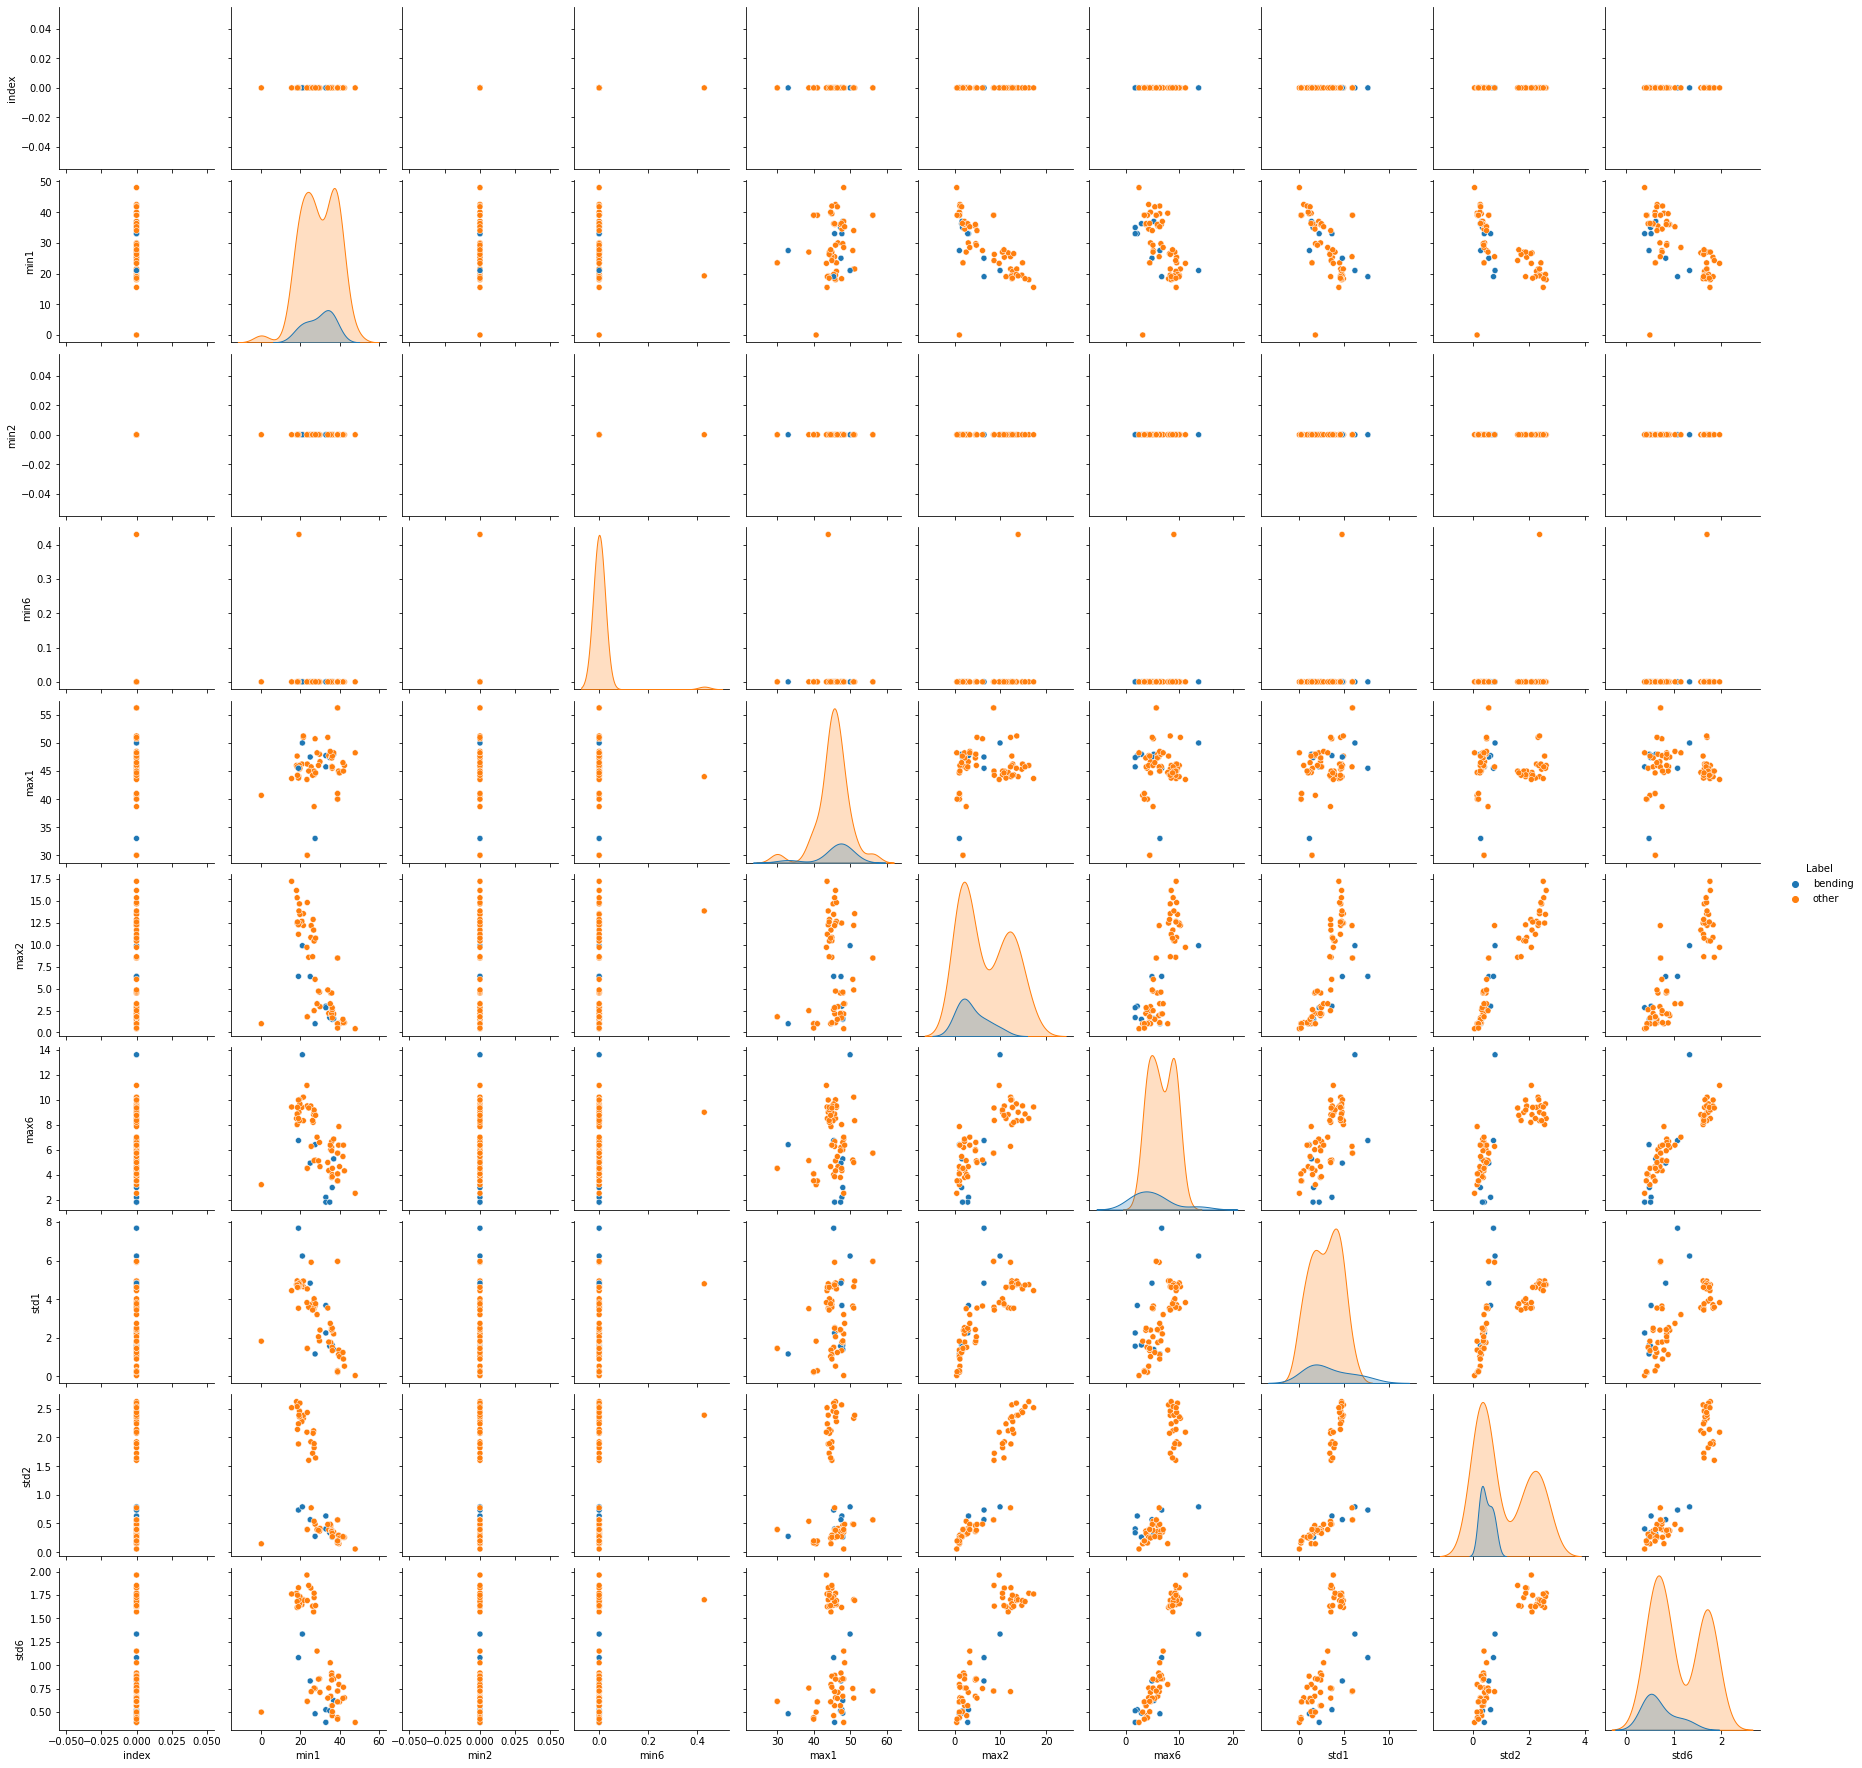

In [27]:
#The three most important time-domain features are: min, max and standard deviation. 
x1=['min1','min2','min6','max1','max2','max6','std1','std2','std6','Label']
sns.pairplot(train_df[x1].reset_index(),hue='Label')


**(ii) Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the training instances, you have 12 time series for each training instance. Repeat the experiment in 2(a)i, i.e depict scatter plots of the features extracted from both parts of the time series 1,2, and 6. Do you see any considerable difference in the results with those of 2(a)i?**

In [28]:
df=pd.read_csv('../data/training/bending1/dataset7.csv')
df.head()

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
0     0      42.00       0.00      18.50       0.50      12.00       0.00
1   250      42.00       0.00      18.00       0.00      11.33       0.94
2   500      42.75       0.43      16.75       1.79      18.25       0.43
3   750      42.50       0.50      16.75       0.83      19.00       1.22
4  1000      43.00       0.82      16.25       0.83      18.00       0.00

In [29]:
def partition(list, n):
    return [list[i::n] for i in range(n)]


parts = partition(list(range(13)), 3)
print(parts)

[[0, 3, 6, 9, 12], [1, 4, 7, 10], [2, 5, 8, 11]]


In [30]:
x=partition(df,5)

In [31]:
def combine(n,x):
    colnames=[]
    for i in range(n):
        l_column_names=list(x[i].columns)
        for j in range(len(l_column_names)):
            l_column_names[j]+='-'+str(i+1)
        colnames+= l_column_names
        x[i].columns = l_column_names
        x[i]=x[i].reset_index(drop = True)
    return pd.concat(x,axis=1)
    

In [32]:
combine(5,x)

time-1  avg_rss12-1  var_rss12-1  avg_rss13-1  var_rss13-1  avg_rss23-1  \
0        0        42.00         0.00        18.50         0.50        12.00   
1     1250        43.67         0.47        12.75         0.83        19.00   
2     2500        43.50         0.50        18.50         0.50        19.50   
3     3750        43.75         0.43        20.00         1.41        19.33   
4     5000        41.50         0.50        15.50         1.12        17.00   
..     ...          ...          ...          ...          ...          ...   
91  113750        44.75         0.43        15.00         0.00        21.50   
92  115000        44.50         0.50        11.25         1.48        24.00   
93  116250        43.50         1.12         6.00         3.27        23.50   
94  117500        43.67         0.47        16.67         1.70        24.67   
95  118750        44.25         0.83        16.25         1.30        24.00   

    var_rss23-1  time-2  avg_rss12-2  var_rss12-2  ...  var_rss13-4  \
0          0.00     250        42.00         0.00  ...         0.83   
1          0.82    1500        43.50         0.50  ...         0.47   
2          1.66    2750        43.75         0.83  ...         0.00   
3          0.94    4000        43.33         0.94  ...         1.41   
4          1.22    5250        42.00         0.00  ...         0.00   
..          ...     ...          ...          ...  ...          ...   
91         0.50  114000        44.33         0.47  ...         0.00   
92         0.00  115250        44.50         0.50  ...         1.48   
93         0.87  116500        42.25         0.43  ...         2.60   
94         0.94  117750        43.67         0.94  ...         0.43   
95         0.00  119000        44.00         0.71  ...         2.87   

    avg_rss23-4  var_rss23-4  time-5  avg_rss12-5  var_rss12-5  avg_rss13-5  \
0         19.00         1.22    1000        43.00         0.82        16.25   
1         20.50         0.50    2250        43.50         0.50        18.00   
2         16.50         0.87    3500        43.75         0.83        19.25   
3         16.25         1.30    4750        41.75         0.43        17.25   
4         23.50         0.50    6000        41.50         0.50        14.67   
..          ...          ...     ...          ...          ...          ...   
91        22.50         1.12  114750        44.75         0.43        15.25   
92        23.50         0.87  116000        44.25         0.83        12.00   
93        23.40         1.20  117250        42.75         0.43        12.50   
94        24.00         0.00  118500        44.50         0.50        16.75   
95        21.50         0.50  119750        44.50         0.50         3.00   

    var_rss13-5  avg_rss23-5  var_rss23-5  
0          0.83        18.00         0.00  
1          1.87        20.50         0.87  
2          1.30        17.25         2.28  
3          0.83        14.00         1.00  
4          0.47        24.00         0.00  
..          ...          ...          ...  
91         0.43        23.50         0.50  
92         0.00        23.25         0.83  
93         0.50        23.33         0.94  
94         1.30        24.25         0.43  
95         1.22        21.50         0.50  

[96 rows x 35 columns]

In [33]:
def split_timesets(df,N):
    X = partition(df,N)
    return(combine(N,X))

In [34]:
split_timesets(df,4)

time-1  avg_rss12-1  var_rss12-1  avg_rss13-1  var_rss13-1  avg_rss23-1  \
0         0        42.00         0.00        18.50         0.50        12.00   
1      1000        43.00         0.82        16.25         0.83        18.00   
2      2000        43.33         0.47        15.33         0.47        20.50   
3      3000        44.25         0.43        21.00         0.00        17.20   
4      4000        43.33         0.94        18.00         1.41        21.33   
..      ...          ...          ...          ...          ...          ...   
115  115000        44.50         0.50        11.25         1.48        24.00   
116  116000        44.25         0.83        12.00         0.00        23.25   
117  117000        42.00         0.00         4.50         2.60        23.40   
118  118000        43.50         0.50        16.50         0.87        23.50   
119  119000        44.00         0.71        11.00         1.00        24.00   

     var_rss23-1  time-2  avg_rss12-2  var_rss12-2  ...  var_rss13-3  \
0           0.00     250        42.00         0.00  ...         1.79   
1           0.00    1250        43.67         0.47  ...         0.00   
2           0.50    2250        43.50         0.50  ...         0.50   
3           0.75    3250        44.00         0.71  ...         1.30   
4           0.47    4250        42.50         0.87  ...         1.41   
..           ...     ...          ...          ...  ...          ...   
115         0.00  115250        44.50         0.50  ...         0.43   
116         0.83  116250        43.50         1.12  ...         3.09   
117         1.20  117250        42.75         0.43  ...         1.70   
118         0.87  118250        44.25         0.43  ...         1.30   
119         0.00  119250        44.25         0.43  ...         2.87   

     avg_rss23-3  var_rss23-3  time-4  avg_rss12-4  var_rss12-4  avg_rss13-4  \
0          18.25         0.43     750        42.50         0.50        16.75   
1          19.75         0.43    1750        43.50         0.50        13.75   
2          19.50         1.66    2750        43.75         0.83        19.67   
3          17.25         2.28    3750        43.75         0.43        20.00   
4          16.25         1.30    4750        41.75         0.43        17.25   
..           ...          ...     ...          ...          ...          ...   
115        24.00         0.00  115750        44.50         0.50         9.75   
116        22.75         1.30  116750        42.25         0.43         7.67   
117        24.67         0.94  117750        43.67         0.94        18.67   
118        24.25         0.43  118750        44.25         0.83        16.25   
119        21.50         0.50  119750        44.50         0.50         3.00   

     var_rss13-4  avg_rss23-4  var_rss23-4  
0           0.83        19.00         1.22  
1           0.83        18.50         0.50  
2           0.47        16.00         0.82  
3           1.41        19.33         0.94  
4           0.83        14.00         1.00  
..           ...          ...          ...  
115         1.48        23.50         0.87  
116         2.62        22.33         1.25  
117         0.94        24.00         1.73  
118         1.30        24.00         0.00  
119         1.22        21.50         0.50  

[120 rows x 28 columns]

In [35]:
def get_column_names(N):
    """
    get enough column names for the split timesets
    """
    cols = ["min","max","mean","median","std","1st quart","3rd quart"]
    columns = []
    for i in range(1,6*(N)+1):
        for j in cols:
            columns.append(j+str(i))
    return columns

In [36]:
def processing_split_timesets(directory,N):
    main_df = pd.DataFrame()
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename!=".DS_Store":
                df= pd.read_csv(os.path.join(root, filename))
                df.drop('time',axis=1,inplace= True)
                df =split_timesets(df,N)     
                x= df.describe().iloc[[3,7,1,5,2,4,6]].transpose()
                new_df = pd.DataFrame(list(x.loc[x.index[0]])).transpose()
                for i in range(1,len(x)):
                    new_df = pd.concat([new_df,pd.DataFrame(list(x.loc[x.index[i]])).transpose()],axis = 1)
                main_df = pd.concat([main_df,new_df])
    main_df.columns = get_column_names(N)
    return main_df.reset_index(drop = True)

In [37]:
train_df_2_parts = processing_split_timesets('../data/training',2)

In [38]:
def add_labels(data,directory):
    l=[]
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename!=".DS_Store":
                #print(root)
                l.append(root.split('/')[-1])
    for i in range(len(l)):
        if l[i]=='bending1' or l[i]=='bending2':
            l[i]='bending'
        else:
            l[i]='other'                
    data['Label']=l
    return data
train_df_2_parts = add_labels(train_df_2_parts,'../data/training')
train_df_2_parts.head()

min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0  36.5  48.00  43.969292   44.500  1.619846     43.3300       44.67   0.0   
1  37.0  47.25  43.464583   43.290  1.403855     42.5000       45.00   0.0   
2  33.0  47.75  42.194083   43.710  3.683760     39.2475       45.00   0.0   
3  34.0  45.75  41.691042   41.750  2.218678     41.3300       42.75   0.0   
4  35.0  47.33  43.955917   44.415  1.568614     43.0000       45.00   0.0   

   max2     mean2  ...  1st quart11  3rd quart11  min12  max12    mean12  \
0  1.25  0.410667  ...      20.5000      23.7500    0.0   2.69  0.555000   
1  1.58  0.378417  ...      22.3100      24.0000    0.0   5.26  0.690042   
2  2.49  0.687833  ...      30.6275      36.3725    0.0   2.18  0.635208   
3  2.83  0.544750  ...      28.5000      31.2500    0.0   1.50  0.387208   
4  1.48  0.427208  ...      35.3625      36.5000    0.0   1.79  0.515042   

   median12     std12  1st quart12  3rd quart12    Label  
0      0.50  0.464668         0.00         0.83  bending  
1      0.50  0.710628         0.43         0.87  bending  
2      0.50  0.538102         0.00         1.00  bending  
3      0.43  0.388919         0.00         0.50  bending  
4      0.45  0.521502         0.00         1.00  bending  

[5 rows x 85 columns]

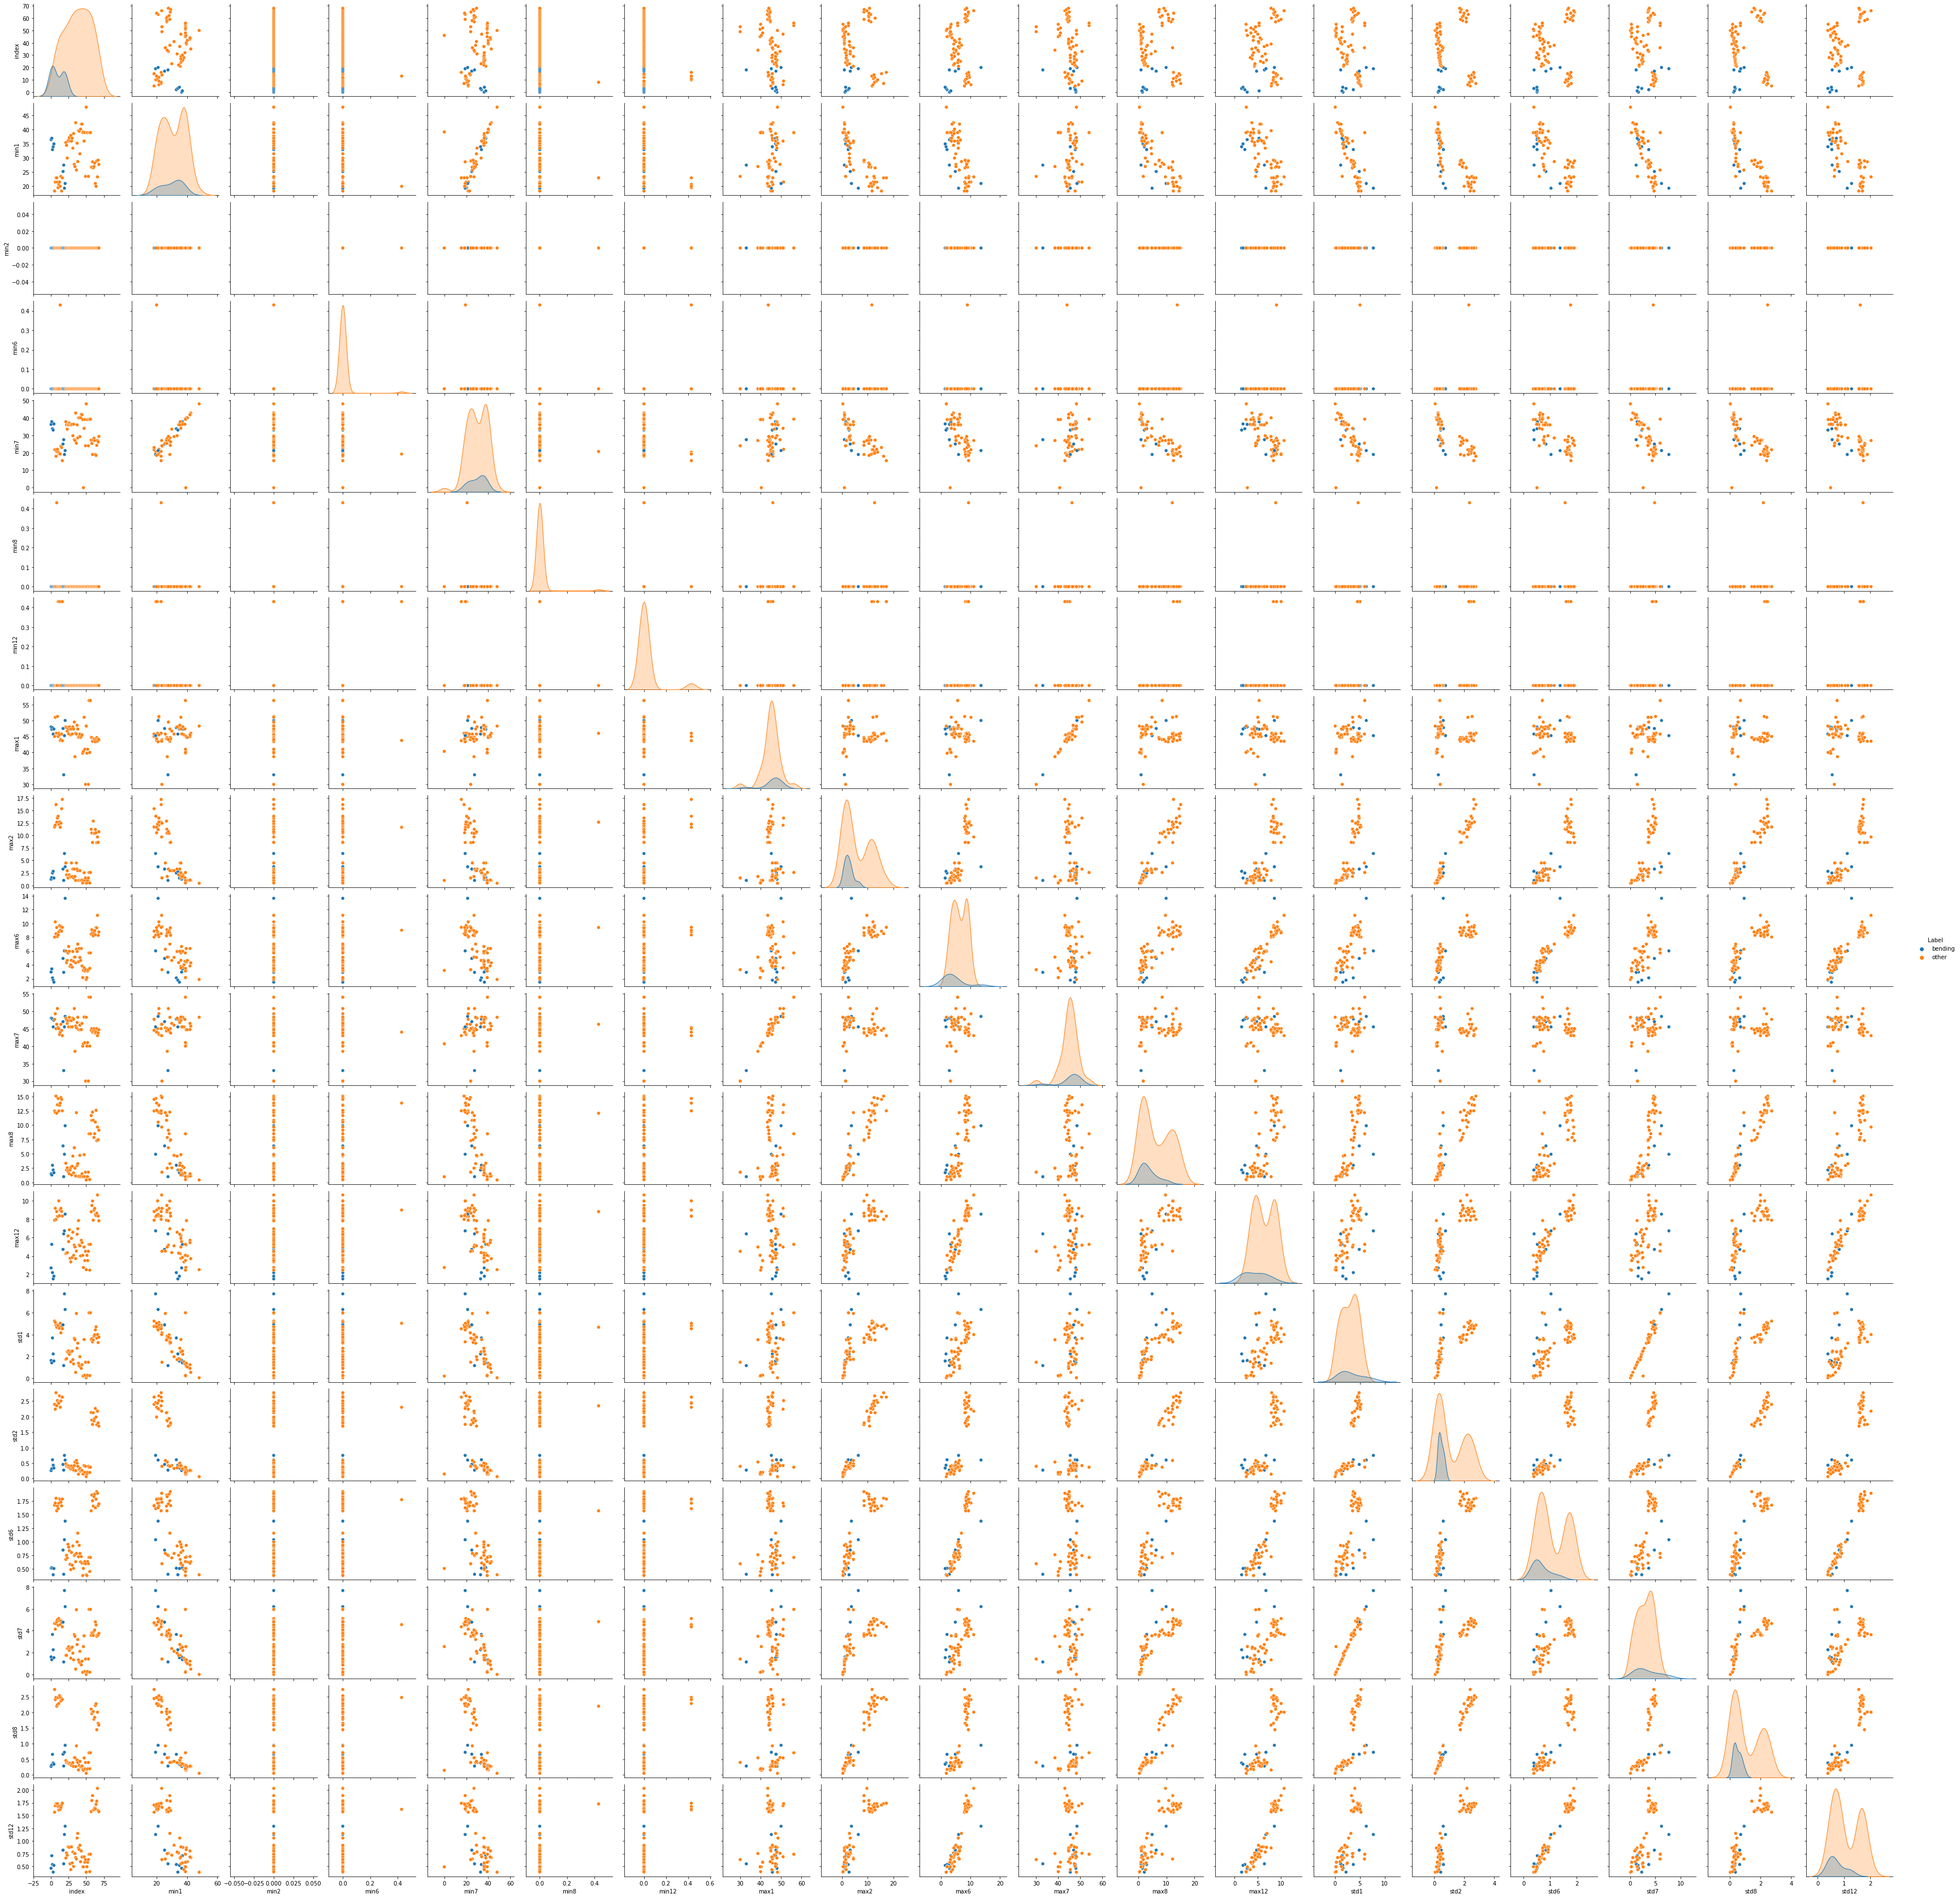

In [39]:
#The three most important time-domain features are: min, max and standard deviation. 
x1=['min1','min2','min6','min7','min8','min12',
    'max1','max2','max6','max7','max8','max12',
    'std1','std2','std6','std7','std8','std12',
    'Label']
sns.pairplot(train_df_2_parts[x1].reset_index(),hue='Label')

**Inference: Yes, a difference can be seen between the two scatterplots. The second scatterplot has more number of features and in certain cases a linear distinction is visible.**

**(iii)Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination. Explain what the right way and the wrong way are to perform cross-validation in this problem.7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.**

In [40]:
#Function to run a logistic regression model using Stratified K-fold CV and using RFE with CV to select best features for 1 training instance
def select_best_features(data):
    lr_sklearn_model = LogisticRegression(penalty = 'none',solver = 'lbfgs',max_iter = 100)
    selector = RFECV(estimator=lr_sklearn_model, scoring='accuracy', cv=StratifiedKFold(n_splits = 5, shuffle=True, random_state=1))
    Xtrain_logi = data[list(data.columns)[:-1]]
    ytrain_logi= data['Label']
    selector.fit(Xtrain_logi,ytrain_logi)
    p = selector.n_features_
    features= Xtrain_logi.columns[selector.support_]
    return(p, features,selector.score(Xtrain_logi,ytrain_logi))

In [41]:
#Testing on l=1, i.e the original training dataset
select_best_features(train_df)

(8,
 Index(['mean1', '3rd quart1', 'max2', 'median3', 'min5', 'max5', 'mean5',
        '1st quart5'],
       dtype='object'),
 1.0)

In [42]:
#function to return selected columns based on the number of splits in the dataset
def selected_cols(N):
    cols = ["min","max","std"] #my chosen set of features
    columns = []
    for i in range(1,6*(N)+1):
        for j in cols:
            columns.append(j+str(i))
    columns.append('Label')
    return columns

In [43]:
# doing from l = 1 to l=20

for l in range(1,21):
    training_data = processing_split_timesets('../data/training',l)
    training_data = add_labels(training_data,'../data/training')
    data = training_data[selected_cols(l)]
    p,features,score = select_best_features(data)
    print("l: ",l," p: ",p," score: ",score, " features: ",features)

l:  1  p:  8  score:  1.0  features:  Index(['min1', 'max1', 'max2', 'min3', 'max4', 'min5', 'max5', 'max6'], dtype='object')
l:  2  p:  9  score:  1.0  features:  Index(['min1', 'max2', 'max4', 'min5', 'max5', 'max7', 'max8', 'min11',
       'max11'],
      dtype='object')
l:  3  p:  10  score:  1.0  features:  Index(['min1', 'max2', 'min5', 'max5', 'min11', 'max11', 'max13', 'max14',
       'min17', 'max17'],
      dtype='object')
l:  4  p:  10  score:  1.0  features:  Index(['max2', 'min5', 'max6', 'max7', 'max8', 'min11', 'max11', 'min13',
       'min17', 'max17'],
      dtype='object')
l:  5  p:  22  score:  1.0  features:  Index(['min1', 'max1', 'max2', 'min5', 'max5', 'max6', 'max7', 'max8', 'min11',
       'max11', 'min13', 'max13', 'max14', 'min17', 'max17', 'max20', 'min23',
       'max23', 'max25', 'min29', 'max29', 'max30'],
      dtype='object')
l:  6  p:  12  score:  1.0  features:  Index(['min1', 'max5', 'max13', 'max14', 'max17', 'max19', 'min23', 'max23',
       'max25

In [44]:
# Refitting the model l=1 and p=8
data = train_df
data['Label']=data['Label'].map({'bending': 1, 'other': 0})
cols = ['min1', 'max1', 'max2', 'min3', 'max4', 'min5', 'max5', 'max6']
lr_sklearn_model = LogisticRegression(penalty = 'none',solver = 'lbfgs',max_iter = 100)
Xtrain_logi = data[cols]
ytrain_logi= data['Label']
lr_sklearn_model.fit(Xtrain_logi,ytrain_logi)
lr_sklearn_model.score(Xtrain_logi,ytrain_logi)


1.0

**The wrong way of cross validation would be to not include all types of classes in both training and validation sets.
If a model trains only on the majority class and the validation is the minority class, the model never learnt to predict the other class. Hence the model may not perform well.**

**The right way would be to use Stratified K fold instead of random K fold cross validation in the case of a class imbalance.**

**Since,
KFold is a cross-validator that divides the dataset into k folds. Stratified is to ensure that each fold of dataset has the same proportion of observations with a given label.**

In [45]:
train_df

min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0   36.25  48.00  43.969125    44.50  1.618364     43.3100       44.67   0.0   
0   37.00  48.00  43.454958    43.25  1.386098     42.5000       45.00   0.0   
0   33.00  47.75  42.179813    43.50  3.670666     39.1500       45.00   0.0   
0   33.00  45.75  41.678063    41.75  2.243490     41.3300       42.75   0.0   
0   35.00  47.40  43.954500    44.33  1.558835     43.0000       45.00   0.0   
..    ...    ...        ...      ...       ...         ...         ...   ...   
0   18.50  44.25  35.752354    36.00  4.614802     33.0000       39.33   0.0   
0   24.25  45.00  37.177042    36.25  3.581301     34.5000       40.25   0.0   
0   23.33  43.50  36.244083    36.75  3.822016     33.4575       39.25   0.0   
0   26.25  44.25  36.957458    36.29  3.434863     34.5000       40.25   0.0   
0   27.75  44.67  37.144833    36.33  3.758904     34.0000       40.50   0.0   

     max2     mean2  ...  1st quart5  3rd quart5  min6   max6     mean6  \
0    1.50  0.413125  ...     20.5000     23.7500   0.0   2.96  0.555313   
0    1.58  0.378083  ...     22.2500     24.0000   0.0   5.26  0.679646   
0    3.00  0.696042  ...     30.4575     36.3300   0.0   2.18  0.613521   
0    2.83  0.535979  ...     28.4575     31.2500   0.0   1.79  0.383292   
0    1.70  0.426250  ...     35.3625     36.5000   0.0   1.79  0.493292   
..    ...       ...  ...         ...         ...   ...    ...       ...   
0   12.60  3.328104  ...     14.0000     18.0625   0.0   9.39  3.069667   
0    8.58  2.374208  ...     17.9500     21.7500   0.0   9.34  2.921729   
0    9.71  2.736021  ...     15.7500     21.0000   0.0  11.15  3.530500   
0    8.64  2.420083  ...     14.0000     18.2500   0.0   8.34  2.934625   
0   10.76  2.419062  ...     15.0000     18.7500   0.0   8.75  2.822437   

    median6      std6  1st quart6  3rd quart6  Label  
0     0.490  0.487826      0.0000      0.8300      1  
0     0.500  0.622534      0.4300      0.8700      1  
0     0.500  0.524317      0.0000      1.0000      1  
0     0.430  0.389164      0.0000      0.5000      1  
0     0.430  0.513506      0.0000      0.9400      1  
..      ...       ...         ...         ...    ...  
0     2.770  1.748326      1.7975      4.0600      0  
0     2.500  1.852600      1.5000      3.9000      0  
0     3.110  1.963685      2.1700      4.6175      0  
0     2.525  1.631380      1.6600      4.0300      0  
0     2.590  1.637183      1.5800      3.7400      0  

[69 rows x 43 columns]

**(iv) Report the confusion matrix and show the ROC and AUC for your classifier on train data. Report the parameters of your logistic regression βi’s as well as the p-values associated with them.**

In [46]:
y_pred = lr_sklearn_model.predict(Xtrain_logi)
confusion_matrix(ytrain_logi,y_pred)

array([[60,  0],
       [ 0,  9]])

In [47]:
roc_auc_score(ytrain_logi,lr_sklearn_model.predict_proba(Xtrain_logi)[:,1])

1.0

AUC: 1.0


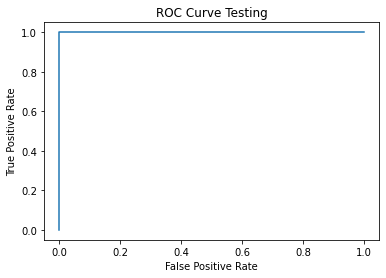

In [48]:
fprate, tprate, thresholds = roc_curve(ytrain_logi, lr_sklearn_model.predict_proba(Xtrain_logi)[:,1], pos_label=1)
auc_score=auc(fprate,tprate)
print("AUC:",auc_score)
plt.plot(fprate,tprate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Testing')
plt.show()

In [49]:
data = train_df
cols = ['min1', 'max1', 'max2', 'min3', 'max4', 'min5', 'max5', 'max6']
Xtrain_logi = data[cols]
ytrain_logi= data['Label']
logistic_regression = sm.Logit(ytrain_logi, Xtrain_logi).fit(method = 'lbfgs')
logistic_regression.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.67276D+01

At iterate    1    f=  5.22036D-01    |proj g|=  4.67059D+00

At iterate    2    f=  4.37399D-01    |proj g|=  3.14844D+00

At iterate    3    f=  3.83930D-01    |proj g|=  1.00097D+00

At iterate    4    f=  3.73239D-01    |proj g|=  1.23928D+00

At iterate    5    f=  2.89665D-01    |proj g|=  4.55286D+00

At iterate    6    f=  2.16039D-01    |proj g|=  3.58313D+00

At iterate    7    f=  1.35225D-01    |proj g|=  1.54995D+00

At iterate    8    f=  9.10652D-02    |proj g|=  7.33115D-01

At iterate    9    f=  6.09583D-02    |proj g|=  3.95908D-01

At iterate   10    f=  4.10204D-02    |proj g|=  2.72773D-01

At iterate   11    f=  2.48714D-02    |proj g|=  2.33968D-01

At iterate   12    f=  1.43670D-02    |proj g|=  1.14830D-01

At iterate   13    f=  8.4

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Label   No. Observations:                   69
Model:                          Logit   Df Residuals:                       61
Method:                           MLE   Df Model:                            7
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                   1.000
Time:                        17:51:20   Log-Likelihood:            -9.2084e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 3.042e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
min1          -1.7898   1356.476     -0.001      0.999   -2660.435    2656.855
max1          -2.0975   1398.203     -0.002      0.999   -2742.525    2738.330
max2          -1.8639   1503.334     -0.001      0.999   -2948.345    2944.617
min3          -1.2870   5025.101     -0.000      1.000   -9850.305    9847.731
max4          -0.9816   2954.344     -0.000      1.000   -5791.390    5789.427
min5           4.6735   3296.020      0.001      0.999   -6455.408    6464.755
max5           4.9683   4615.989      0.001      0.999   -9042.203    9052.140
max6          -0.9160   2533.090     -0.000      1.000   -4965.682    4963.850
==============================================================================

Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

**(v) Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.**

### Testing data

In [50]:
data = test_df #since l=1
data['Label']=data['Label']. map({'bending': 1, 'other': 0})
cols = ['min1', 'max1', 'max2', 'min3', 'max4', 'min5', 'max5', 'max6']
Xtest_logi = data[cols]
ytest_logi= data['Label']
lr_sklearn_model.score(Xtest_logi,ytest_logi)


1.0

In [51]:
y_pred = lr_sklearn_model.predict(Xtest_logi)
confusion_matrix(ytest_logi,y_pred)

array([[15,  0],
       [ 0,  4]])

**Testing accuracy is the same as the cross-validation accuracy i.e 1.0**

**(vi) Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?**

It can be concluded that the classes are well separated. 

It can be seen from the summary which states as follows:
Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters are not identified.

**(vii) From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.**

As per the confusion matrix 60 instances belong to one class (here it is bending) and the remaining 9 instances (non-bending). It can be seen that there is a huge variation in the number of instances belonging to each class and hence we can see imbalanced classes.
Confusion matrix in 1 d) iv)

In [52]:
train_df['Label'].value_counts()

0    60
1     9
Name: Label, dtype: int64

In [53]:
added_rows = train_df[train_df['Label']==1].sample(51,replace = True)

In [54]:
#Modified Dataset
mod_train_df = pd.concat([added_rows,train_df])
mod_train_df

min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0   33.00  47.75  42.179813    43.50  3.670666     39.1500       45.00   0.0   
0   27.50  33.00  29.881938    30.00  1.153837     29.0000       30.27   0.0   
0   36.25  48.00  43.969125    44.50  1.618364     43.3100       44.67   0.0   
0   33.00  45.75  41.678063    41.75  2.243490     41.3300       42.75   0.0   
0   19.00  45.50  30.938104    29.00  7.684146     26.7500       38.00   0.0   
..    ...    ...        ...      ...       ...         ...         ...   ...   
0   18.50  44.25  35.752354    36.00  4.614802     33.0000       39.33   0.0   
0   24.25  45.00  37.177042    36.25  3.581301     34.5000       40.25   0.0   
0   23.33  43.50  36.244083    36.75  3.822016     33.4575       39.25   0.0   
0   26.25  44.25  36.957458    36.29  3.434863     34.5000       40.25   0.0   
0   27.75  44.67  37.144833    36.33  3.758904     34.0000       40.50   0.0   

     max2     mean2  ...  1st quart5  3rd quart5  min6   max6     mean6  \
0    3.00  0.696042  ...     30.4575     36.3300   0.0   2.18  0.613521   
0    1.00  0.256438  ...     17.0000     19.0000   0.0   6.40  0.701625   
0    1.50  0.413125  ...     20.5000     23.7500   0.0   2.96  0.555313   
0    2.83  0.535979  ...     28.4575     31.2500   0.0   1.79  0.383292   
0    6.40  0.467167  ...     15.0000     20.8125   0.0   6.73  1.107354   
..    ...       ...  ...         ...         ...   ...    ...       ...   
0   12.60  3.328104  ...     14.0000     18.0625   0.0   9.39  3.069667   
0    8.58  2.374208  ...     17.9500     21.7500   0.0   9.34  2.921729   
0    9.71  2.736021  ...     15.7500     21.0000   0.0  11.15  3.530500   
0    8.64  2.420083  ...     14.0000     18.2500   0.0   8.34  2.934625   
0   10.76  2.419062  ...     15.0000     18.7500   0.0   8.75  2.822437   

    median6      std6  1st quart6  3rd quart6  Label  
0     0.500  0.524317      0.0000      1.0000      1  
0     0.710  0.481103      0.4700      0.9400      1  
0     0.490  0.487826      0.0000      0.8300      1  
0     0.430  0.389164      0.0000      0.5000      1  
0     0.830  1.080842      0.4700      1.3000      1  
..      ...       ...         ...         ...    ...  
0     2.770  1.748326      1.7975      4.0600      0  
0     2.500  1.852600      1.5000      3.9000      0  
0     3.110  1.963685      2.1700      4.6175      0  
0     2.525  1.631380      1.6600      4.0300      0  
0     2.590  1.637183      1.5800      3.7400      0  

[120 rows x 43 columns]

In [55]:
# The classes in the dataset have been balanced
mod_train_df['Label'].value_counts()

1    60
0    60
Name: Label, dtype: int64

In [56]:
#Training and testing of the model on the modified dataset
data = mod_train_df
cols = ['min1', 'max1', 'max2', 'min3', 'max4', 'min5', 'max5', 'max6']
Xtrain_logi = data[cols]
ytrain_logi= data['Label']
logistic_regression = LogisticRegression(penalty = 'none',solver = 'lbfgs',max_iter = 100)
logistic_regression.fit(Xtrain_logi,ytrain_logi)
logistic_regression.score(Xtrain_logi,ytrain_logi)

1.0

##### Training Set

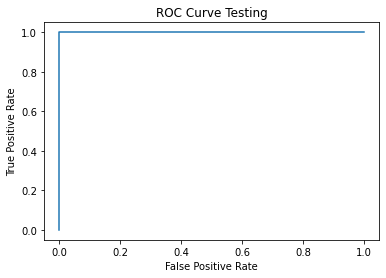

In [57]:
fprate, tprate, thresholds = roc_curve(ytrain_logi, logistic_regression.predict_proba(Xtrain_logi)[:,1], pos_label=1)
plt.plot(fprate,tprate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Testing')
plt.show()

In [58]:
y_pred = logistic_regression.predict(Xtrain_logi)
confusion_matrix(ytrain_logi,y_pred)

array([[60,  0],
       [ 0, 60]])

###### Testing Set

In [59]:
test_df

min1   max1      mean1  median1      std1  1st quart1  3rd quart1  min2  \
0  37.25  45.00  40.624792   40.500  1.476967     39.2500     42.0000   0.0   
0  38.00  45.67  42.812812   42.500  1.435550     42.0000     43.6700   0.0   
0  19.33  43.50  34.227771   35.500  4.889576     30.5000     37.7500   0.0   
0  12.50  45.00  33.509729   34.125  4.850923     30.5000     36.7500   0.0   
0  15.00  46.75  34.660583   35.000  5.315110     31.0000     38.2500   0.0   
0  12.75  51.00  24.562958   24.250  3.737514     23.1875     26.5000   0.0   
0   0.00  42.75  27.464604   28.000  3.583582     25.5000     30.0000   0.0   
0  33.33  48.00  44.334729   45.000  2.476940     42.2500     46.5000   0.0   
0  35.50  46.25  43.174938   43.670  1.989052     42.5000     44.5000   0.0   
0  32.75  47.00  42.760563   44.500  3.398919     41.3300     45.3725   0.0   
0  33.25  48.00  42.363563   43.000  2.068247     42.0000     43.5000   0.0   
0  37.00  50.75  45.917667   45.635  1.089027     45.0000     46.5000   0.0   
0  44.50  46.75  45.239667   45.000  0.429915     45.0000     45.3300   0.0   
0  23.50  30.00  27.716375   27.500  1.442253     27.0000     29.0000   0.0   
0  24.75  48.33  44.182937   48.000  7.495615     48.0000     48.0000   0.0   
0  48.00  48.25  48.004167   48.000  0.032038     48.0000     48.0000   0.0   
0  24.25  45.00  37.177042   36.250  3.581301     34.5000     40.2500   0.0   
0  28.75  44.75  37.561188   36.875  3.226507     35.2500     40.2500   0.0   
0  22.00  44.67  37.058708   36.000  3.710180     34.5000     40.0625   0.0   

    max2     mean2  ...  1st quart5  3rd quart5  min6  max6     mean6  \
0   1.30  0.358604  ...     33.0000     36.0000   0.0  1.92  0.570583   
0   1.22  0.372438  ...     32.0000     34.5000   0.0  3.11  0.571083   
0  14.50  3.995729  ...     14.7500     18.6700   0.0  9.74  3.394125   
0  13.05  4.450771  ...     14.6275     18.7500   0.0  8.96  3.378479   
0  13.44  4.200896  ...     14.2500     18.5000   0.0  8.99  3.244396   
0   6.87  0.590833  ...     20.5000     27.0000   0.0  4.97  0.700188   
0   7.76  0.449708  ...     15.0000     20.7500   0.0  6.76  1.122125   
0   3.90  0.432958  ...      9.3300     17.7500   0.0  5.02  0.933000   
0   2.12  0.506583  ...     12.7500     16.5000   0.0  5.72  0.911979   
0   3.34  0.486167  ...     13.0000     18.5650   0.0  5.73  0.842271   
0   4.44  0.492563  ...     10.1875     17.6900   0.0  6.02  1.034021   
0   4.87  0.324542  ...     16.5000     21.0000   0.0  7.22  0.904604   
0   1.00  0.172958  ...     17.6275     21.0000   0.0  8.20  0.837250   
0   1.79  0.363688  ...      5.5000     10.7500   0.0  4.50  0.734271   
0   3.11  0.101875  ...      2.0000      5.5425   0.0  3.91  0.692771   
0   0.43  0.007167  ...      4.6700     10.0000   0.0  2.50  0.641229   
0   8.58  2.374208  ...     17.9500     21.7500   0.0  9.34  2.921729   
0   9.91  2.080688  ...     18.0000     21.5000   0.0  9.62  2.765896   
0  14.17  2.438146  ...     16.0000     21.0000   0.0  8.55  2.983750   

   median6      std6  1st quart6  3rd quart6  Label  
0    0.430  0.582915      0.0000       1.300      1  
0    0.430  0.601010      0.0000       1.300      1  
0    3.100  1.792090      2.1050       4.425      0  
0    3.085  1.787360      2.0600       4.440      0  
0    3.000  1.630983      2.1200       4.240      0  
0    0.500  0.693720      0.4300       0.870      1  
0    0.830  1.012342      0.4700       1.300      1  
0    0.830  0.673609      0.4700       1.250      0  
0    0.830  0.666161      0.4700       1.220      0  
0    0.710  0.722165      0.4300       1.090      0  
0    0.830  0.985627      0.4700       1.250      0  
0    0.710  0.896171      0.4300       1.120      0  
0    0.710  0.835344      0.4300       1.120      0  
0    0.710  0.613688      0.4300       1.000      0  
0    0.500  0.675781      0.3225       0.940      0  
0    0.500  0.388372      0.4600       0.830      0  
0    2.500  1.852600      1.5000       3.900

In [60]:
data = test_df
Xtest_logi = data[cols]
ytest_logi= data['Label']
logistic_regression.score(Xtest_logi,ytest_logi)

1.0

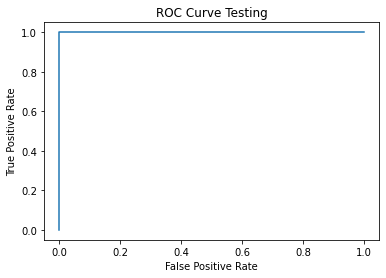

In [61]:
fprate, tprate, thresholds = roc_curve(ytest_logi, logistic_regression.predict_proba(Xtest_logi)[:,1], pos_label=1)
plt.plot(fprate,tprate)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Testing')
plt.show()

In [62]:
y_pred = logistic_regression.predict(Xtest_logi)
confusion_matrix(ytest_logi,y_pred)

array([[15,  0],
       [ 0,  4]])

**(b) Binary Classification Using L1-penalized logistic regression**

**i. Repeat 2(a)iii using L1-penalized logistic regression,8 i.e. instead of using p- values for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.9**


In [63]:
#(b) (i)
def penalized_select_best_features(data):
    lr_sklearn_model = LogisticRegression(penalty = 'l1',solver = 'liblinear',max_iter = 200)
    selector = RFECV(estimator=lr_sklearn_model, scoring='accuracy', cv=StratifiedKFold(n_splits = 5, shuffle=True, random_state=1))
    Xtrain_logi = data[list(data.columns)[:-1]]
    ytrain_logi= data['Label']
    selector.fit(Xtrain_logi,ytrain_logi)
    p = selector.n_features_
    features= Xtrain_logi.columns[selector.support_]
    return(p, features,selector.score(Xtrain_logi,ytrain_logi))
# doing from l = 1 to l=20

for l in range(1,21):
    training_data = processing_split_timesets('../data/training',l)
    training_data = add_labels(training_data,'../data/training')
    data = training_data[selected_cols(l)]
    p,features,score = penalized_select_best_features(data)
    print("l: ",l," p: ",p," score: ",score, " features: ",features)


l:  1  p:  4  score:  0.9855072463768116  features:  Index(['max1', 'max2', 'min5', 'max5'], dtype='object')
l:  2  p:  5  score:  1.0  features:  Index(['min1', 'max1', 'max2', 'min5', 'max11'], dtype='object')
l:  3  p:  5  score:  1.0  features:  Index(['min1', 'max8', 'max11', 'max14', 'min17'], dtype='object')
l:  4  p:  6  score:  1.0  features:  Index(['min1', 'max2', 'max6', 'max7', 'max11', 'min17'], dtype='object')
l:  5  p:  5  score:  1.0  features:  Index(['max8', 'max11', 'min19', 'max20', 'min23'], dtype='object')
l:  6  p:  6  score:  1.0  features:  Index(['min1', 'max14', 'max19', 'min29', 'max29', 'min35'], dtype='object')
l:  7  p:  4  score:  1.0  features:  Index(['max5', 'max8', 'min29', 'min37'], dtype='object')
l:  8  p:  25  score:  1.0  features:  Index(['min2', 'max2', 'std2', 'min3', 'max3', 'min7', 'max7', 'std7', 'max8',
       'max11', 'max14', 'max17', 'min23', 'min31', 'max31', 'min33', 'max33',
       'std33', 'min34', 'min35', 'min39', 'min43', 'max4

/Users/shreyavinaynayak/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


l:  18  p:  8  score:  1.0  features:  Index(['min1', 'max23', 'min35', 'max41', 'max50', 'max67', 'max86', 'max95'], dtype='object')
l:  19  p:  2  score:  0.9855072463768116  features:  Index(['max11', 'max109'], dtype='object')


/Users/shreyavinaynayak/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


l:  20  p:  4  score:  1.0  features:  Index(['max35', 'min63', 'max79', 'min83'], dtype='object')


In [67]:
# Refitting the model l=2 and p=5
training_data = processing_split_timesets('../data/training',2)
training_data = add_labels(training_data,'../data/training')
training_data['Label'] = training_data['Label'].map({'bending': 1, 'other': 0})
cols = ['min1', 'max1', 'max2', 'min5', 'max11']
lr_sklearn_model = LogisticRegression(penalty = 'l1',solver = 'liblinear',max_iter = 200)
Xtrain_logi = training_data[cols]
ytrain_logi= training_data['Label']
lr_sklearn_model.fit(Xtrain_logi,ytrain_logi)
lr_sklearn_model.score(Xtrain_logi,ytrain_logi)


1.0

**ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?**

L1 penalized logistic regression is easier to implement as compared to variable selection.\
Performance wise both of them are able to give an accuracy of 1.0 but they differ in terms of the number of features needed to give the accuracy.
It can be seen that for lesser number of features L1 penalized was able to yield an accuracy of 1.0.\
Whereas in variable selection more number of features are needed to yield the same accuracy of 1.0. Also in the summary table the p-values are very close to 1 which makes them statistically insignificant.



**(c) Multi-class Classification (The Realistic Case)**

**(i) Find the best l in the same way as you found it in 2(b)i to build an L1- penalized multinomial regression model to classify all activities in your train- ing set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.11**

In [68]:
def add_multiclass_labels(data,directory):
    l=[]
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename!=".DS_Store":
                #print(root)
                l.append(root.split('/')[-1])
    for i in range(len(l)):
        if l[i]=='bending1' or l[i]=='bending2':
            l[i]='bending'                
    data['Label']=l
    return data

In [77]:
# doing from l = 1 to l=20

for l in range(1,21):
    training_data = processing_split_timesets('../data/training',l)
    training_data = add_multiclass_labels(training_data,'../data/training')
    training_data['Label'] = LabelEncoder().fit_transform(training_data['Label'])
    data = training_data[selected_cols(l)]
    p,features,score = penalized_select_best_features(data)
    print("l: ",l," p: ",p," score: ",score, " features: ",features)

l:  1  p:  8  score:  0.9565217391304348  features:  Index(['max1', 'max2', 'max3', 'std3', 'max4', 'min5', 'max5', 'std5'], dtype='object')
l:  2  p:  8  score:  0.9420289855072463  features:  Index(['std1', 'max2', 'max3', 'std5', 'max8', 'max9', 'std9', 'max11'], dtype='object')
l:  3  p:  13  score:  0.9855072463768116  features:  Index(['min1', 'max3', 'max4', 'max5', 'max7', 'max8', 'max9', 'std9', 'max10',
       'max14', 'max15', 'min17', 'std17'],
      dtype='object')
l:  4  p:  28  score:  1.0  features:  Index(['min1', 'max1', 'max2', 'min3', 'max3', 'std3', 'min5', 'std5', 'max6',
       'min7', 'max7', 'max8', 'max9', 'max10', 'max11', 'max13', 'max14',
       'max15', 'max16', 'min17', 'max17', 'max18', 'max20', 'min21', 'max21',
       'max22', 'min23', 'max23'],
      dtype='object')
l:  5  p:  12  score:  1.0  features:  Index(['max2', 'max3', 'max8', 'max9', 'max11', 'std17', 'max19', 'max21',
       'min23', 'max24', 'max26', 'std27'],
      dtype='object')
l:  6  p

**The best l here is l=4.**

In [70]:
data = processing_split_timesets('../data/training',4)
data = add_multiclass_labels(data,'../data/training')
data["Label"] = LabelEncoder().fit_transform(data['Label'])
cols = ['min1', 'max1', 'max2', 'min3', 'max3', 'std3', 'min5', 'std5', 'max6',
       'min7', 'max7', 'max8', 'max9', 'max10', 'max11', 'max13', 'max14',
       'max15', 'max16', 'min17', 'max17', 'max18', 'max20', 'min21', 'max21',
       'max22', 'min23', 'max23']
lr_sklearn_model = LogisticRegression(penalty = 'l1',solver = 'liblinear',max_iter = 250)
Xtrain_logi = data[cols]
ytrain_logi= data['Label']

lr_sklearn_model.fit(Xtrain_logi,ytrain_logi)


data2 = processing_split_timesets('../data/testing',4)
data2 = add_multiclass_labels(data2,'../data/testing')
data2["Label"] = LabelEncoder().fit_transform(data2['Label'])
cols = ['min1', 'max1', 'max2', 'min3', 'max3', 'std3', 'min5', 'std5', 'max6',
       'min7', 'max7', 'max8', 'max9', 'max10', 'max11', 'max13', 'max14',
       'max15', 'max16', 'min17', 'max17', 'max18', 'max20', 'min21', 'max21',
       'max22', 'min23', 'max23']

Xtest_logi = data2[cols]
ytest_logi = data2['Label']


lr_sklearn_model.score(Xtest_logi,ytest_logi)

0.7368421052631579

**Test error= 1- model score= 0.224**

In [71]:
y_pred = lr_sklearn_model.predict(Xtrain_logi)
confusion_matrix(ytrain_logi,y_pred)

array([[ 9,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0],
       [ 0,  0, 12,  0,  0,  0],
       [ 0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0, 12]])

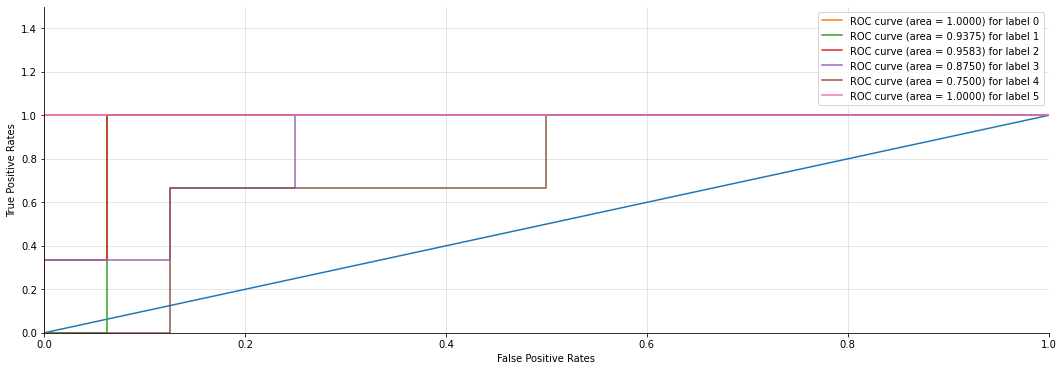

In [72]:
n_classes = len(data2['Label'].unique())
y_score = lr_sklearn_model.decision_function(Xtest_logi)

# structures
fpr_dict = dict()
tpr_dict = dict()
roc_auc = dict()

# aggregating dummies
ytest_logi_dummies = pd.get_dummies(ytest_logi, drop_first=False).values
for i in range(n_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(ytest_logi_dummies[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr_dict[i], tpr_dict[i])

# calculating the roc for each class
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot([0, 1], [0, 1],)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.5])
ax.set_xlabel('False Positive Rates')
ax.set_ylabel('True Positive Rates')
for i in range(n_classes):
    ax.plot(fpr_dict[i], tpr_dict[i], label='ROC curve (area = %0.4f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()


**(ii) Repeat 2(c)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.**

In [73]:
#Gaussian Naive Bayes
for l in range(1,21):
    training_data = processing_split_timesets('../data/training',l)
    training_data = add_multiclass_labels(training_data,'../data/training')
    training_data['Label'] = LabelEncoder().fit_transform(training_data['Label'])
    data = training_data[selected_cols(l)]
    Xtrain_logi = data[list(data.columns)[:-1]]
    ytrain_logi= data['Label']
    model = GaussianNB()
    CV= StratifiedKFold(n_splits = 5, shuffle=True, random_state=24)
    for train_index, test_index in CV.split(Xtrain_logi, ytrain_logi):
        X_cv_train, X_cv_test = Xtrain_logi.loc[train_index], Xtrain_logi.loc[test_index]
        y_cv_train, y_cv_test = ytrain_logi.loc[train_index], ytrain_logi.loc[test_index]
    model.fit(X_cv_train,y_cv_train)
    score= model.score(X_cv_test,y_cv_test)
    print("l: ",l," score: ",score)


l:  1  score:  0.9230769230769231
l:  2  score:  0.9230769230769231
l:  3  score:  0.7692307692307693
l:  4  score:  0.6923076923076923
l:  5  score:  0.7692307692307693
l:  6  score:  0.8461538461538461
l:  7  score:  0.6923076923076923
l:  8  score:  0.8461538461538461
l:  9  score:  0.7692307692307693
l:  10  score:  0.8461538461538461
l:  11  score:  0.7692307692307693
l:  12  score:  0.8461538461538461
l:  13  score:  0.8461538461538461
l:  14  score:  0.7692307692307693
l:  15  score:  0.6923076923076923
l:  16  score:  0.7692307692307693
l:  17  score:  0.6923076923076923
l:  18  score:  0.7692307692307693
l:  19  score:  0.6923076923076923
l:  20  score:  0.7692307692307693


In [74]:
training_data = processing_split_timesets('../data/training',1)
training_data = add_multiclass_labels(training_data,'../data/training')
training_data['Label'] = LabelEncoder().fit_transform(training_data['Label'])
data = training_data[selected_cols(1)]
Xtrain_logi = data[list(data.columns)[:-1]]
ytrain_logi= data['Label']
model = GaussianNB()
CV= StratifiedKFold(n_splits = 5, shuffle=True, random_state=24)
for train_index, test_index in CV.split(Xtrain_logi, ytrain_logi):
    X_cv_train, X_cv_test = Xtrain_logi.loc[train_index], Xtrain_logi.loc[test_index]
    y_cv_train, y_cv_test = ytrain_logi.loc[train_index], ytrain_logi.loc[test_index]
model.fit(X_cv_train,y_cv_train)
score= model.score(X_cv_test,y_cv_test)
print("l: ",1," score: ",score)
print(model)

l:  1  score:  0.9230769230769231
GaussianNB()


In [75]:
#Multinomial
for l in range(1,21):
    training_data = processing_split_timesets('../data/training',l)
    training_data = add_multiclass_labels(training_data,'../data/training')
    training_data['Label'] = LabelEncoder().fit_transform(training_data['Label'])
    data = training_data[selected_cols(l)]
    Xtrain_logi = data[list(data.columns)[:-1]]
    ytrain_logi= data['Label']
    model = MultinomialNB()
    CV= StratifiedKFold(n_splits = 5, shuffle=True, random_state=24)
    for train_index, test_index in CV.split(Xtrain_logi, ytrain_logi):
        X_cv_train, X_cv_test = Xtrain_logi.loc[train_index], Xtrain_logi.loc[test_index]
        y_cv_train, y_cv_test = ytrain_logi.loc[train_index], ytrain_logi.loc[test_index]
    model.fit(X_cv_train,y_cv_train)
    score= model.score(X_cv_test,y_cv_test)
    print("l: ",l," score: ",score)

l:  1  score:  0.8461538461538461
l:  2  score:  0.8461538461538461
l:  3  score:  0.8461538461538461
l:  4  score:  0.8461538461538461
l:  5  score:  0.8461538461538461
l:  6  score:  0.8461538461538461
l:  7  score:  0.8461538461538461
l:  8  score:  0.8461538461538461
l:  9  score:  0.8461538461538461
l:  10  score:  0.8461538461538461
l:  11  score:  0.8461538461538461
l:  12  score:  0.8461538461538461
l:  13  score:  0.8461538461538461
l:  14  score:  0.7692307692307693
l:  15  score:  0.8461538461538461
l:  16  score:  0.7692307692307693
l:  17  score:  0.8461538461538461
l:  18  score:  0.8461538461538461
l:  19  score:  0.8461538461538461
l:  20  score:  0.7692307692307693


In [76]:
training_data = processing_split_timesets('../data/training',1)
training_data = add_multiclass_labels(training_data,'../data/training')
training_data['Label'] = LabelEncoder().fit_transform(training_data['Label'])
data = training_data[selected_cols(1)]
Xtrain_logi = data[list(data.columns)[:-1]]
ytrain_logi= data['Label']
model = MultinomialNB()
CV= StratifiedKFold(n_splits = 5, shuffle=True, random_state=24)
for train_index, test_index in CV.split(Xtrain_logi, ytrain_logi):
    X_cv_train, X_cv_test = Xtrain_logi.loc[train_index], Xtrain_logi.loc[test_index]
    y_cv_train, y_cv_test = ytrain_logi.loc[train_index], ytrain_logi.loc[test_index]
model.fit(X_cv_train,y_cv_train)
score= model.score(X_cv_test,y_cv_test)
print("l: ",1," score: ",score)

l:  1  score:  0.8461538461538461


**(iii) Which method is better for multi-class classification in this problem?**

The accuracy achieved for Logistic regression at l=4 is 0.736\
The accuracy achieved for Gaussian Naive Bayes at l=1 is 0.923\
The accuracy achieved for Multinomial Naive Bayes at l=1 is 0.846\
Thus out of all the 3 models Gaussian Naive Bayes performs the best for my chosen set of features.\
However out of Gaussian Naive Bayes and Multinomial Naive Bayes- Gaussian Naive Bayes yields a higher accuracy in this case.

**3.) ISLR 4.8.3**

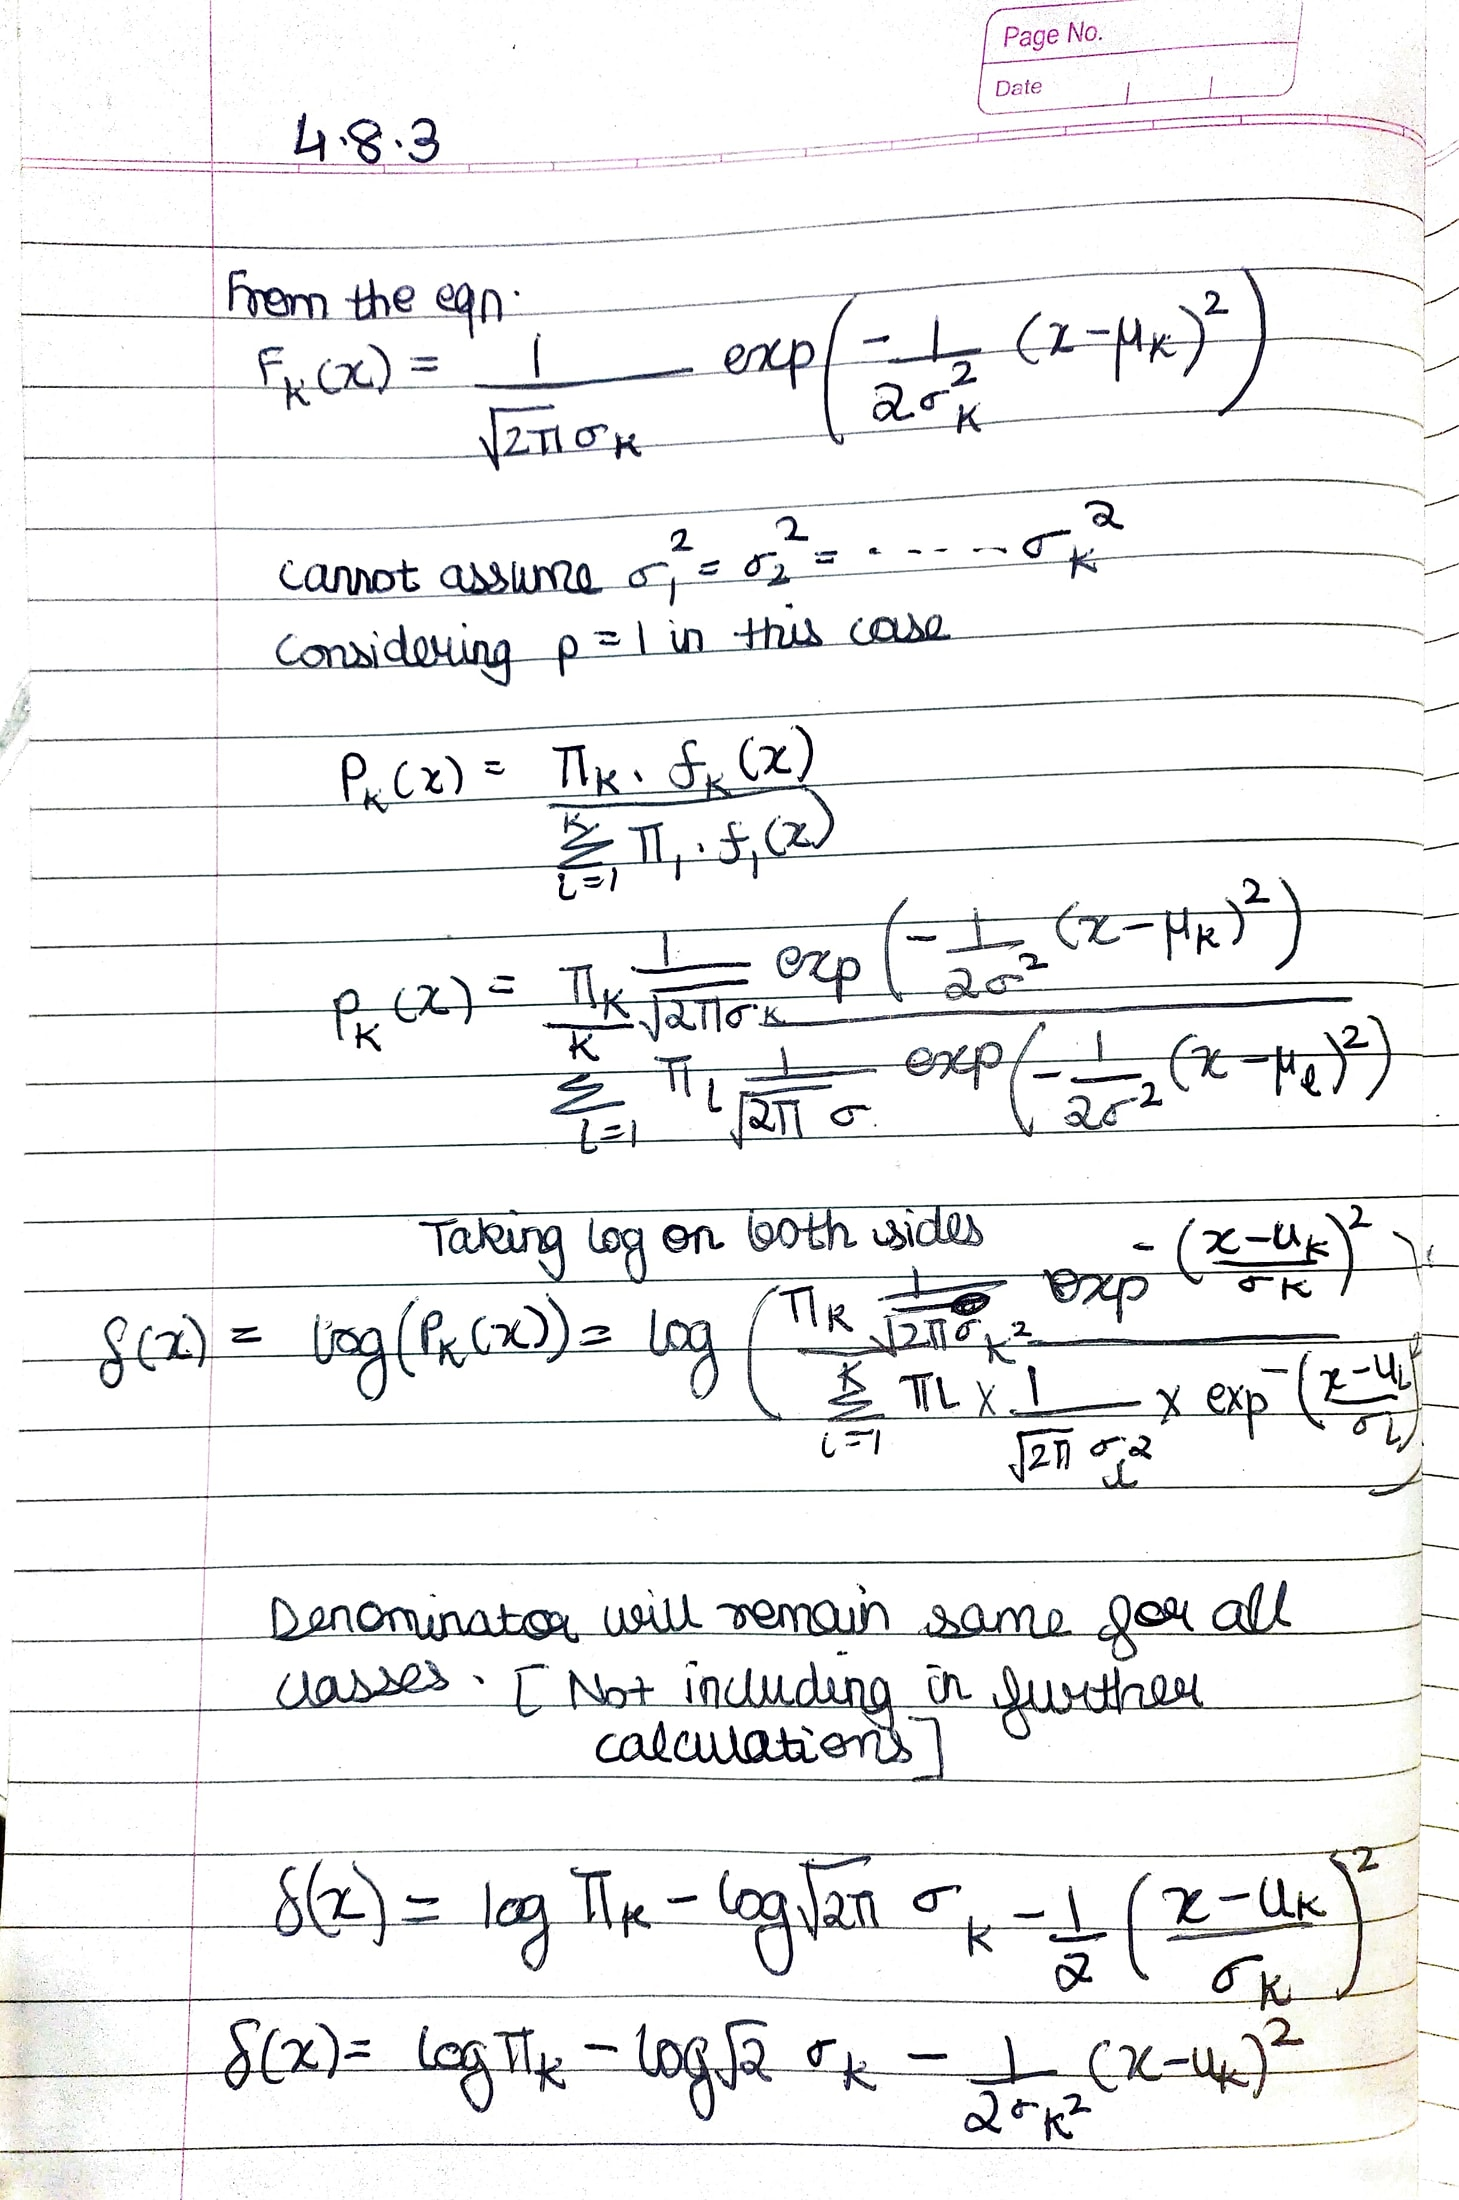

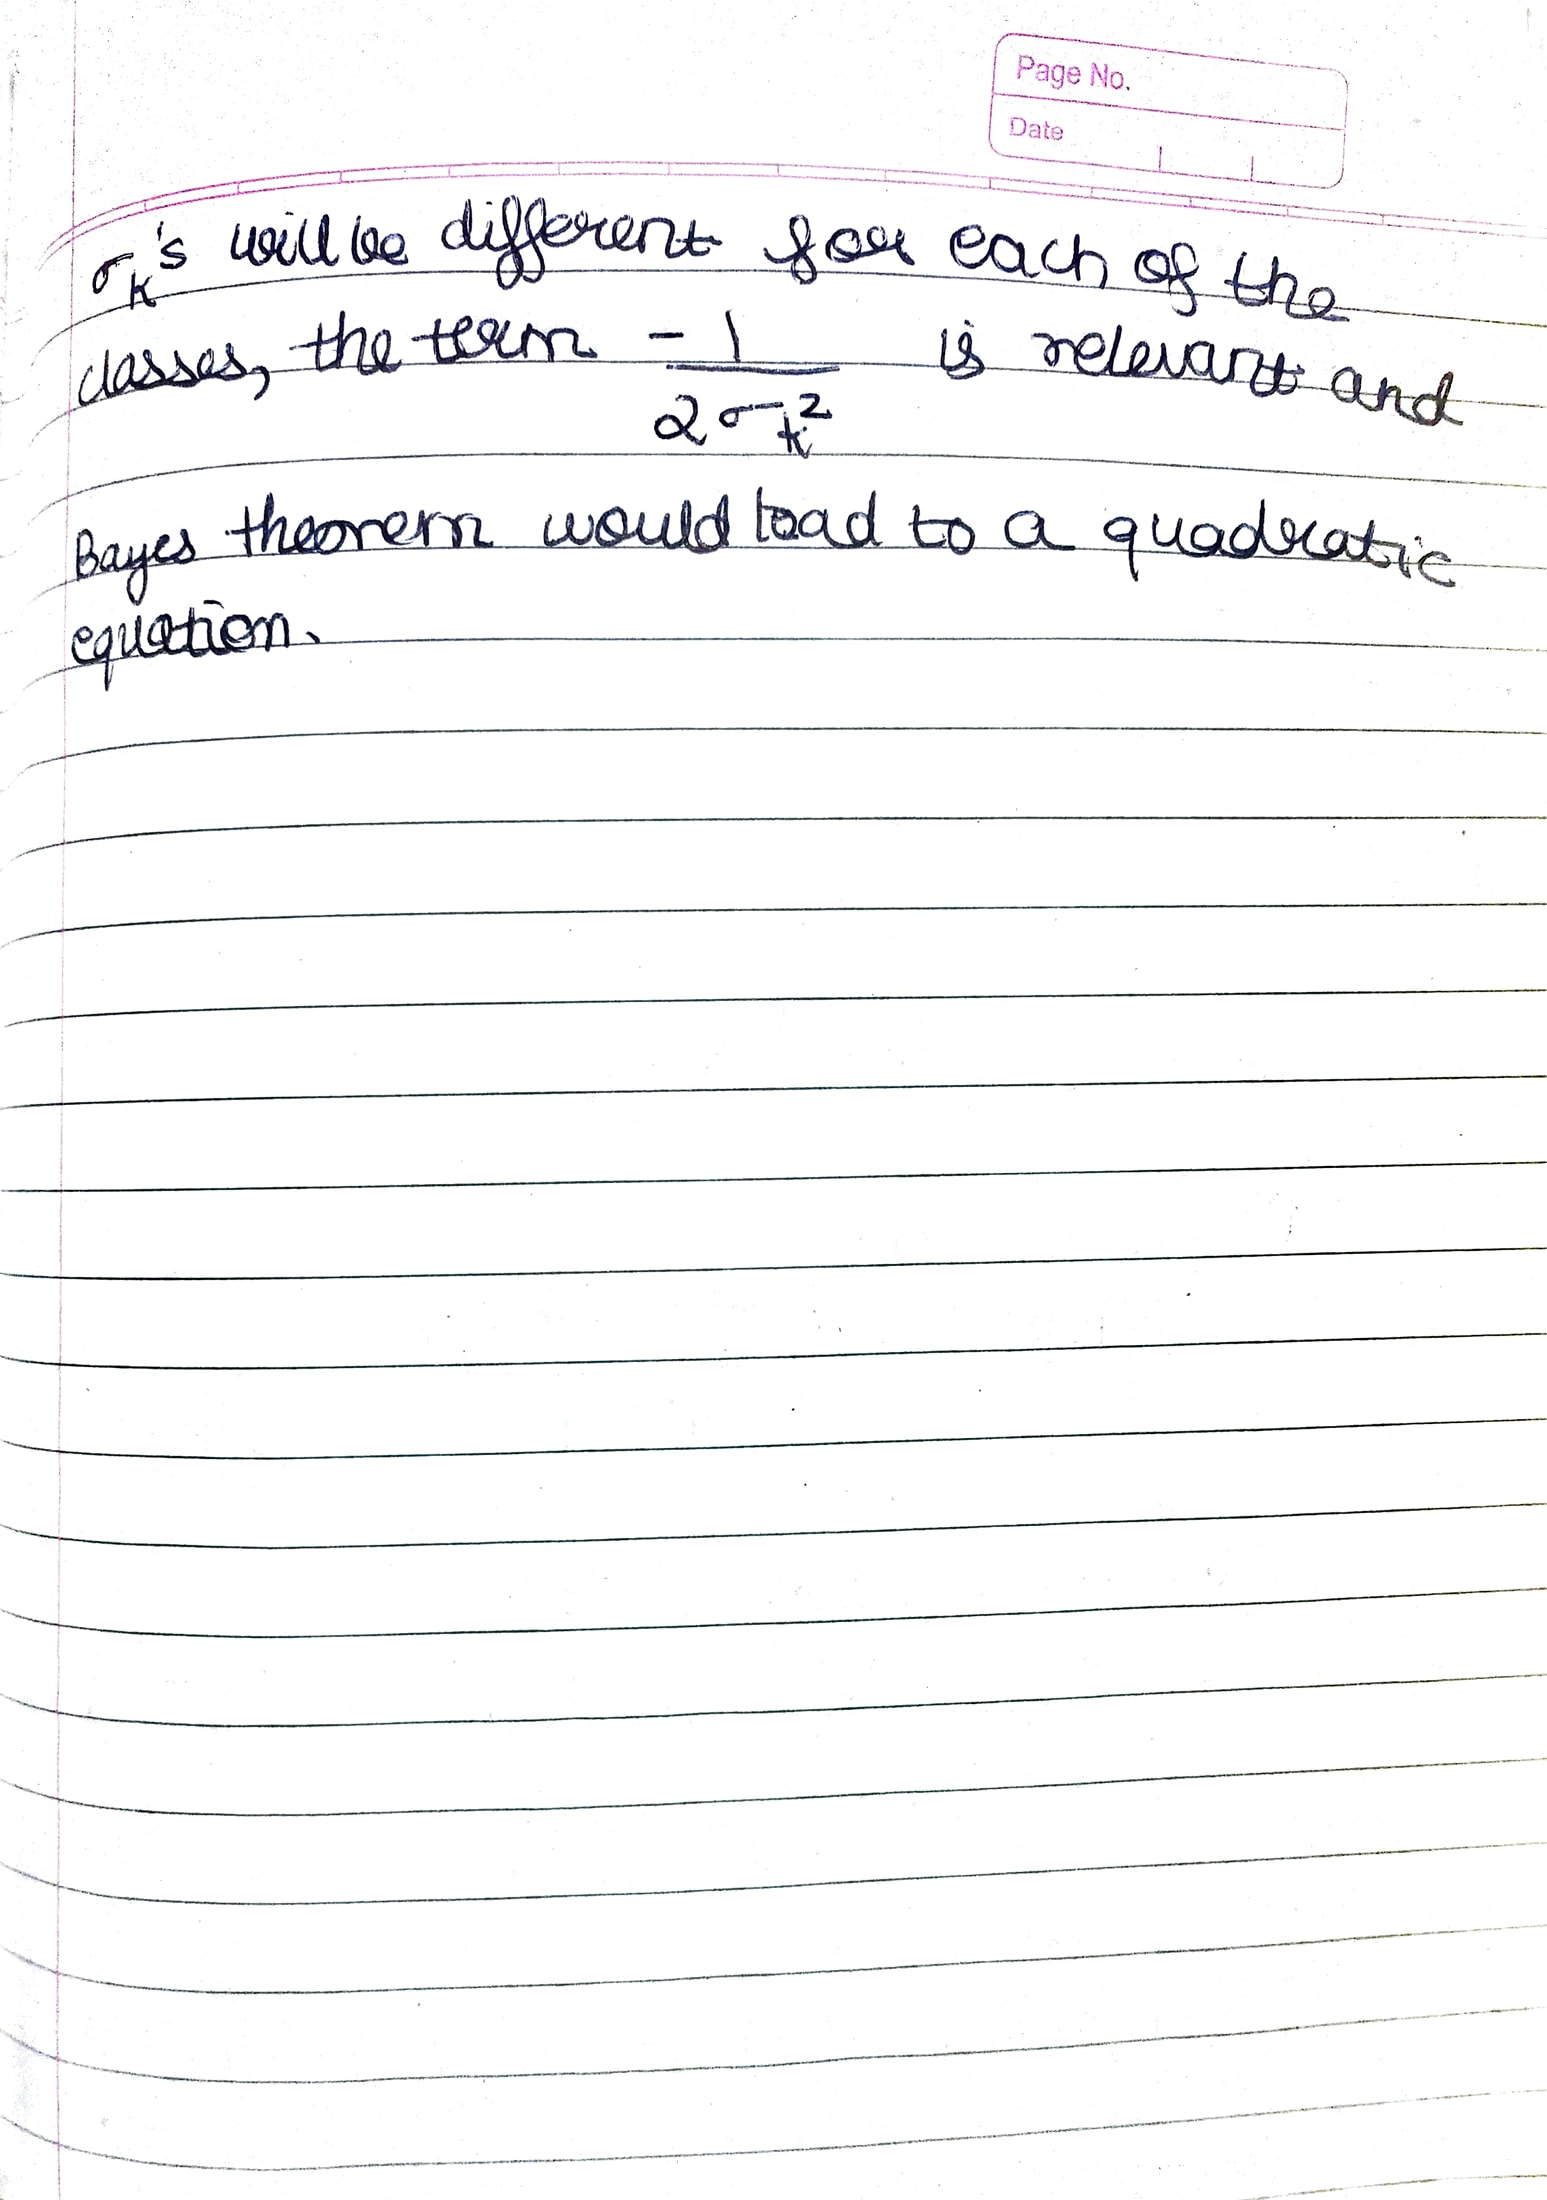

**4.) ISLR 4.8.7**

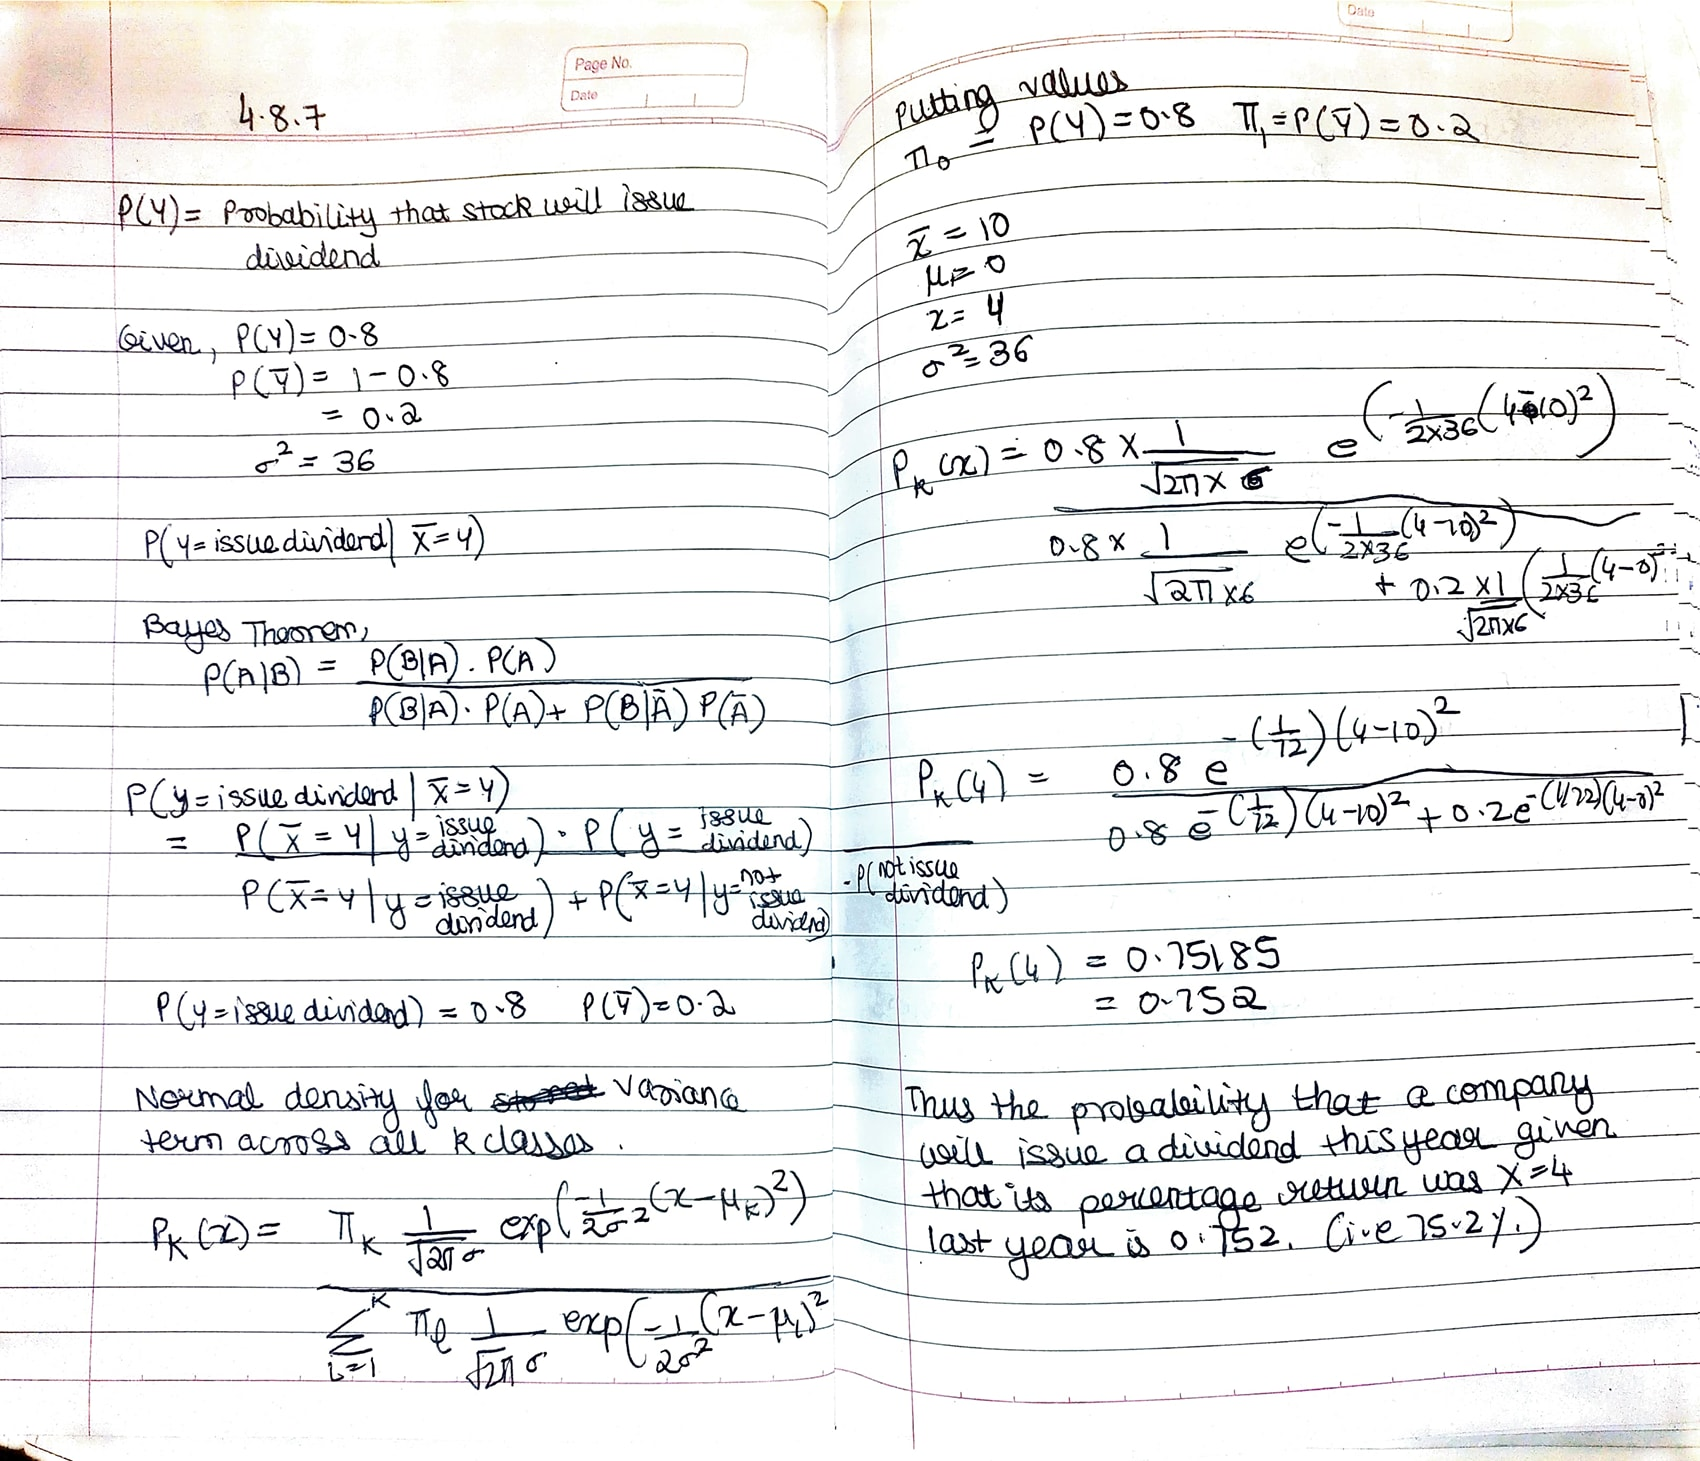

Reference Links:\
https://stackoverflow.com/questions/2130016/splitting-a-list-into-n-parts-of-approximately-equal-length

https://thewebdev.info/2021/10/24/how-to-split-a-list-into-n-parts-of-approximately-equal-length-with-python/

https://www.geeksforgeeks.org/how-to-add-suffix-to-column-names-in-r-dataframe/

https://www.statology.org/bootstrapping-in-python/

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html